In [93]:
import nltk
import textstat
import string
import os
from nltk.corpus import wordnet as wn
import math

In [94]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk.stem as ns
lemmatizer = ns.WordNetLemmatizer()
porter=nltk.PorterStemmer()
lancaster=nltk.LancasterStemmer()
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer('english')

In [95]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

In [96]:
file=open(r"C:\Users\spike\Desktop\COCA 20000 test.txt")
coca=[]
coca_w=[]
item=()
for line in file:
    line=line.lower()
    lis=line.strip("\ufeff").split()
    item=(lis[1],lis[2])
    coca_w.append(lis[1])
    coca.append(item)
cocadic={}
for item in coca:
    cocadic[item[0]]=item[1]
file="3500.txt"
file=open(file)
wl3500=[]
for line in file:
    wl3500.append(line.lower().strip("\ufeff").strip("\n"))

file="ngsl3000.txt"
file=open(file)
ngsl=[]
for line in file:
    ngsl.append(line.lower().strip("\ufeff").strip("\n"))
wordlist=[]
for word in ngsl:
    if word not in wl3500:
        wordlist.append(word)
wordlist.extend(wl3500)
wordlist.sort()
wlstem={}
for word in wordlist: #将NGSL词汇与词根对应储存为词典系统
    wlstem[word]=(porter.stem(word),lancaster.stem(word),snowball.stem(word))
cocastem={}
for word in cocadic: #将COCA词汇与词根对应储存为词典系统
    cocastem[word]=(porter.stem(word),lancaster.stem(word),snowball.stem(word))
file="wn.noun.txt"
file=open(file)
wordnetnoun=[]
for line in file:
    line=line.strip("\n")
    if "_" not in line:
            wordnetnoun.append(line)
wordstem={}
for word in wordnetnoun: #将所有词汇与词根对应储存为词典系统
    wordstem[word]=(porter.stem(word),lancaster.stem(word),snowball.stem(word))
nsuffix=("ness","ment","tion","ity","ance","sion","ship","ism","ty","ency","cy")
asuffix=('less',"ful","ly","y","able","ible","ary","like","ive","ent","ous")  
alldic={}
alldic.update(wlstem)
alldic.update(cocastem)
alldic.update(wordstem)

In [97]:
%matplotlib inline

In [98]:
#导入 stanfordcore nlp
import stanfordnlp  

from stanfordcorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP(r'C:\Users\spike\python\stanford-corenlp-full-2018-10-05',lang='en')

xnlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos,lemma')

xnlp = stanfordnlp.Pipeline()

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\spike\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': 'C:\\Users\\spike\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tagger.pt', 'pretrain_path': 'C:\\Users\\spike\\stanfordnlp_resources\\en_ewt_models\\en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'C:\\Users\\spike\\stanfordnlp_resources\\en_ewt_models\\en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\spike\\stanfordnlp_resources\\en_ewt_models\\en_ewt_to

In [99]:
def readsent(file):
    list_sents=[]
    
    text=open(file,encoding='utf-8',errors='ignore')
        
    for line in text:
        line=line.strip()
        sent=nltk.sent_tokenize(line)
        
        list_sents+=sent
    return list_sents

In [100]:
def readsenttext(text):
    list_sents=[]
    
    line=text.strip()
    sent=nltk.sent_tokenize(line)
        
    list_sents+=sent
    return list_sents

In [101]:
def Ncnp(s):
    target=find_cnp(s)
    return len(target)

In [102]:
def syllable_n(text): #语篇音位总量计算
    result=textstat.syllable_count(text)
    return result

In [103]:
def SYanalyse(text):  #各单词的音素计算，不计算标点,重复仍然计算
    avoidance=string.punctuation+string.whitespace
    text=nltk.word_tokenize(text)
    data=[]
    words=[]
    for w in text:
        if w not in avoidance:
            words.append(w)
            data.append(syllable_n(w))
        
    return data

In [104]:
def SIanalyse(text):  #音素总藏动态计算
    
    target=SYanalyse(text)
    data=[]
    for n in range(1,len(target)+1):
        data.append(sum(target[:n]))
    
    return data

In [105]:
def token_n(text): #语篇单词总量
    result=0
    avoidance=string.punctuation+string.whitespace
    text=text.replace("\n"," ").replace("“",'"').replace("”",'"').replace("’","'").replace("‘","'")
    sent=nltk.word_tokenize(text)
    for c in sent:
        if c not in avoidance:
            result+=1
    return result

In [291]:
def word_freq(text): #语篇单词频次 返回[（单词，频次，频序），。。。]
    avoidance=string.punctuation+string.whitespace
    output = nltk.FreqDist(word.lower() for word in nltk.word_tokenize(text))
    output=sorted(output.items(), key=lambda output: output[1], reverse=True)
    templist=[]
    for c in output:
        if c[0] not in avoidance:
            templist.append(c)
    output=templist
    result=[(output[0][0],output[0][1],1)]
    for n in range(1,len(output)):
        #if output[n][0] not in avoidance:
            if output[n][1]==output[n-1][1]:
                result.append((output[n][0],output[n][1],result[n-1][2]))
            else:
                result.append((output[n][0],output[n][1],n+1))
    
    return result

In [107]:
file=open(r"C:\Users\spike\Documents\语料库\词表\COCA20000.txt")
coca20000_t=[]
coca20000=[]
item=()
for line in file:
    line=line.lower()
    lis=line.strip("\ufeff").split()
    item=(lis[1])
    #coca_w.append(lis[1])
    coca20000.append(item)



In [108]:
file=open(r"C:\Users\spike\Documents\语料库\词表\NGSL WordFreq.txt")
NGSLWordFreq=[]
NGSLDIC={}
item=()
for line in file:
    line=line.lower()
    lis=line.strip("\ufeff").split()
    NGSLWordFreq.append((lis[0],lis[1]))
    NGSLDIC[lis[0]]=lis[1]
    #coca_w.append(lis[1])
    #coca20000.append(item)

In [109]:
def lemmatize(text):
    output=[]
    doc = xnlp(text)
    for sent in doc.sentences:
        for word in sent.words:
            if (word.lemma,word.text) not in output:
                output.append((word.lemma,word.text))
    
    return output

In [110]:
def fltofw(text):#根据NGSL词表确定寻找超频词
    result=[]
    lemma=lemmatize(text)
    wfreq=word_freq(text)
    length=0
    for w in wfreq:
        length+=w[1]
    avoidance=string.punctuation+string.whitespace
    for n in range(0,len(wfreq)):
        for w in lemma:
            if w[1].lower()==wfreq[n][0]:
                if w[0].lower() not in NGSLDIC:
                    result.append(w[1])
                elif wfreq[n][1]/length*1000000>float(NGSLDIC[w[0].lower()]):
                    result.append(w[1])
    return result
            
                

In [111]:
def fltofwfile(file):#根据NGSL词表确定寻找超频词
    text=readfile(file)
    result=[]
    lemma=lemmatize(text)
    wfreq=word_freq(text)
    length=0
    for w in wfreq:
        length+=w[1]
    avoidance=string.punctuation+string.whitespace
    for n in range(0,len(wfreq)):
        for w in lemma:
            if w[1].lower()==wfreq[n][0]:
                if w[0].lower() not in NGSLDIC:
                    result.append(w[1])
                elif wfreq[n][1]/length*1000000>float(NGSLDIC[w[0].lower()]):
                    result.append(w[1])
    return result
            
                

In [112]:
def LIanalyse(text):  #语篇词汇总藏 算重复数据为0
    avoidance=string.punctuation+string.whitespace
    text=nltk.word_tokenize(text)
    data=[]
    types=[]
    for w in text:
        if w not in avoidance:
            if w not in types:
                types.append(w)
        
            data.append(len(types))

    return data

In [113]:
def h_point(text): #语篇中的h点，秩频分布特征
    wordfreq=word_freq(text)
    n=0
    h=0
    for w,f,r in wordfreq:
        if f==r:
            h=f
    if h==0:
        while wordfreq[n][1]>wordfreq[n][2]:
            n+=1
        r1=wordfreq[n-1][2]
        r2=wordfreq[n][2]
        f1=wordfreq[n-1][1]
        f2=wordfreq[n][1]
        h=((f1*r2)-(f2*r1))/(r2-r1+f1-f2)
        print(r1,f1,r2,f2)

    return h

In [114]:
def mlength(text): #语篇平均词长
    token=token_n(text)
    result=round(len(text)/token,2)
    return result

In [115]:
def msyllable_n(text): #语篇词汇平均音素长度
    return round(syllable_n(text)/token_n(text),2)

In [116]:
def semantem_n(text):  #计算语篇的多义度 和 同义度
    words=nltk.word_tokenize(text)
    result1=0
    result2=0
    for word in words:
        synsets=wn.synsets(word)
        syn_n=len(synsets)
        result1+=syn_n
        for syn in synsets:
            result2+=len(syn.lemma_names())
    return (result1,result2)

In [117]:
def POanalyse(text): #语篇多意度动态计算 动态多义度增量为 POanalyse(text)[0],多义度集合为POanalyse[1]
    avoidance=string.punctuation+string.whitespace
    words=nltk.word_tokenize(text)
    result1=[]
    result2=[]
    for word in words:
        if word not in avoidance:
            synsets=wn.synsets(word)
            syn_n=len(synsets)
            result1.append(syn_n)
    data=[]
    for n in range(1,len(result1)+1):
        data.append(sum(result1[:n]))
        
    return (data,result1)
    

In [118]:
def WLanalyse(text): #词汇长度动态计算 计算重复数据
    avoidance=string.punctuation+string.whitespace
    target=nltk.word_tokenize(text)
    data=[]
    for w in target:
        if w not in avoidance:
            data.append(len(w))
    data1=[]
    for n in range(1,len(data)+1):
        data1.append(sum(data[:n]))
    return data1

In [119]:
def WL2list(text): #词汇长度计算 汇总每个词汇的长度
    avoidance=string.punctuation+string.whitespace
    target=nltk.word_tokenize(text)
    data=[]
    for w in target:
        if w not in avoidance:
            data.append(len(w))
    return data

In [120]:
def msemantem(text): #语篇词汇平均多义度计算（基于wordnet）
    token=token_n(text)
    semantem_sum=semantem_n(text)
    result=semantem_sum/token
    return round(result,2)

In [121]:
def SyngAnalyse(text): #语篇的协同分析输入语篇返回 (语篇总长、音符总数、多义总和、同义总和、平均词长、平均音符数、平均多义度、平均同义度）
    T=token_n(text)
    S=syllable_n(text)
    PN,SN=semantem_n(text)
    ML=mlength(text)
    MS=round(S/T,2)
    MPN=round(PN/T,2)
    MSN=round(SN/T,2)
    result=[]
    output='N\tS\tPN\tSN\tML\tMS\tMPN\tMSN\n'
    
    for c in (T,S,PN,SN,ML,MS,MPN,MSN):
        result.append(c)
        output+=str(c)+'\t'
    print(output)
    return result
    
    

In [122]:
def lemma(s):
    output=[]
    doc = xnlp(s)
    for sent in doc.sentences:
        for word in sent.words:
            output.append(word.lemma)
    return output

In [123]:
def gonver(s):
    output=[]
    doc=xnlp(s)
    for word in doc.sentences[0].words:
        output.append(word.governor)
    return output

In [124]:
def dependency(s):
    s=nlp.dependency_parse(s)
    output=[]
    for n in range(1,len(s)+1):
        for w in s:
            if w[2]==n:
                output.append(w)
    return output

In [125]:
def stanz(s): #分析一个句子中的各个成分包括单词、lemma、词性、依存关系、序列
    words=nlp.word_tokenize(s)
    dep=dependency(s)
    tags=[]
    for item in nlp.pos_tag(s):
        tags.append(item[1])
    lemmas=lemma(s)
    gov=[]
    dpg=[]
    govw=[]
    for w in dep:
        gov.append(w[1])
        dpg.append(w[0])
        govw.append(words[w[1]-1])
    length=len(words)+1
    ifhead=[]
    
    for n in range(1,length): 
        if n in gov:
            ifhead.append('head')
        else:
            ifhead.append('nonehead')
        
    tup=zip(words,tags,gov,lemmas,dpg,range(1,length),govw,ifhead)
    output=[]
    for item in tup:
        output.append(item)
    return output

In [183]:
def stanz(s): #分析一个句子中的各个成分包括单词、snowball词根、词性、依存关系、序列
    words=nlp.word_tokenize(s)
    dep=dependency(s)
    tags=[]
    for item in nlp.pos_tag(s):
        tags.append(item[1])
    lemmas=[]
    for w in words:
        lemmas.append(snowball.stem(w))
    gov=[]
    dpg=[]
    govw=[]
    for w in dep:
        gov.append(w[1])
        dpg.append(w[0])
        govw.append(words[w[1]-1])
    length=len(words)+1
    ifhead=[]
    
    for n in range(1,length): 
        if n in gov:
            ifhead.append('head')
        else:
            ifhead.append('nonehead')
        
    tup=zip(words,tags,gov,lemmas,dpg,range(1,length),govw,ifhead)
    output=[]
    for words,tags,gov,lemmas,dpg,num,govw,ifhead in tup:
        if tags in ('NNP','NNPS'):
            output.append((words,tags,gov,lemmas,dpg,num,govw,ifhead))
        else:
            output.append((words.lower(),tags,gov,lemmas,dpg,num,govw,ifhead))
    return output

In [127]:
def stanztext(text):
    text=nltk.sent_tokenize(text)
    result=[]
    for s in text:
        result.append(stanz(s))
    return result

In [128]:
#主题集中度计算 运用stanza计算词的POS 然后计算主题集中度
def contentword(text):
    stanzlot=stanz(text)
    wordfreq=word_freq(text)
    #hpoint=h_point(text)
    result=[]
    cwpos=("MD","VB","VBD","VBG","VBN","VBP","VBZ","JJ","JJR","JJS","RB","RBR","RBS","NN","NNS","NNP","NNPS","WP","WP$","WRB","PRP","PRP$")
    for w,f,r in wordfreq:
        for c in stanzlot:
            if w==c[0].lower() and (c[0],f,r,c[1]) not in result and c[1] in cwpos and c[0]==c[3]:
                result.append((c[0],f,r,c[1]))
            elif w==c[0].lower() and (w,f,r,c[1]) not in result and c[1] in cwpos:
                result.append((w,f,r,c[1]))
    return result

In [129]:
def TCanalyse(text): #主题集中度(数据集，和数值)
    contentwordl=contentword(text)
    wordfreql=word_freq(text)
    h=h_point(text)
    TC=0
    TrS=[]
    for w,f,r,p in contentwordl:
        if r<h:
            Tr=2*(h-r)*f/(h*(h-1)*wordfreql[0][1])
            TrS.append((w,f,r,p,Tr))
            TC+=Tr
    TC=round(TC,4)
    return(TrS,TC)

In [508]:
def STCanalyse(text): #次主题集中度
    contentwordl=contentword(text)
    wordfreql=word_freq(text)
    h=h_point(text)
    TC=0
    TrS=[]
    #h=2*h
    h1=2*h
    for w,f,r,p in contentwordl:
        if r<=2*h and r>h:
            Tr=2*(h1-r)*f/(h1*(h1-1)*wordfreql[0][1])
            TrS.append((w,f,r,p,Tr))
            TC+=Tr
    TC=round(TC,4)
    return(TrS,TC)

In [131]:
def ADanalyse(text): #分析活动度和描写度
    stanzl=stanz(text)
    VA=0
    V=0
    for c in stanzl:
        if c[1] in ("MD","VB","VBD","VBG","VBN","VBP","VBZ","JJ","JJR","JJS"):
            VA+=1
            if c[1] in ("MD","VB","VBD","VBG","VBN","VBP","VBZ"):
                V+=1
    if VA!=0:
        return (round(V/VA,2),round((VA-V)/VA,2))
    else:
        return 0

In [132]:
def LRAanalyse(text): #计算秩序分布的欧式距离L以及R指数，文本的Lambda值（laimte）的大写（莱姆特）
    wordfreql=word_freq(text)
    L=0
    LR=0
    h=h_point(text)
    N=0
    for n in range(0,len(wordfreql)-1):
        N+=wordfreql[n][1]
        if n+1<h:
            LR+=((wordfreql[n][1]-wordfreql[n+1][1])**2+1)**1/2
        L+=((wordfreql[n][1]-wordfreql[n+1][1])**2+1)**1/2
    R=1-round((LR/L),2)
    A=round(L*(math.log(N,10))/N,2)
    return (L,R,A)

In [133]:
def WVanalyse(text):#分析作者视角
    h=h_point(text)
    wq=word_freq(text)
    f=wq[0][1]
    v=len(wq)
    cosA=(-((h-1)*(f-h)+(h-1)*(v-h)))/(((h-1)**2+(f-h)**2)**1/2+((h-1)**2+(v-h)**2)**1/2)
    return round(cosA,2)

In [134]:
def NT_unit(s): #计算T unit 结构
    n=0
    #print(nlp.parse(s))
    
    parse=nlp.parse(s).split('\r\n')
    print(parse)
    
    for no in range(0,len(parse)):
        #print(line)
        if no!=len(parse) and parse[no][-2:]=='(S' and parse[no+1][-2:]!='(S':
            n+=1
            print(parse[no])
        if parse[no].replace(' ','') in ('(SBAR','(TO'):
            n=n-1
            #print(line)
    return n
            

In [135]:
def find_np(s):
    target=frags(s)
    
    result=[]
    for c in target:
        if c[:3]=='(NP':
            result.append(c)
    return result

In [136]:
def find_cnp(s): #find complex np
    target=find_np(s)
    result=[]
    for c1 in target:
        n=0
        for c2 in target:
            if c1 in c2:
                n+=1
        if n<=1:
            for c2 in ("(PP",'(VBN','JJ','SBAR','(S(','(VBG('):
                if c2 in c1 and c1 not in result:
                    result.append(c1)
    return result

In [137]:
def Nverb(s): #计算从句数量
    n=0
    #print(nlp.parse(s))
    parse=nlp.parse(s).split()
    #print(parse)
    for line in parse:
        #print(line)
        if line in ('(VBP','(VBZ','(VBD','(MD'):
            n+=1
            #print(line)
        #if line in ('(TO'):
        #    n=n-1
            #print(line)
    return n

In [138]:
def Ndpclause(s): #计算关系从句数量
    n=0
    #print(nlp.parse(s))
    parse=nlp.parse(s).split()
    #print(parse)
    for line in parse:
        #print(line)
        if line=='(SBAR':
            n+=1
            #print(line)
        #if line in ('(TO'):
        #    n=n-1
            #print(line)
    return n

In [139]:
def match(lx,ly):
    if len(lx)>=len(ly):
        l1=lx
        l2=ly
    else:
        l1=ly
        l2=lx
    for n1 in range(0,len(l1)):
        if l1[n1]==l2[0]:
            if l1[n1:n1+len(l2)]==l2:
                return True
    return False

In [140]:
def frags(s): #定位了各类括号，找到句子中的各种结构 #还是不对
    parse=nlp.parse(s).replace('\r\n','') #.replace(' ','')
    parsepos=""
    frags=[]
    print(parse)
    cln=[]
    crn=[]
    x1=0
    #x2=0
    #y1=0
    y2=0
    x0=0
    for n1 in range(0,len(parse)):
        if parse[n1]=='(':
            x1+=1
            y1=0
            for cha in parse[n1:]:
                if cha==")":
                    y1+=1
            cln.append((n1,x1-1,y1))
        elif parse[n1]==")":
            x2=x1
            y2=0
            for cha in parse[n1:]:
                if cha==")":
                    y2+=1
            crn.append((n1,x1,y2-1))
    #print((cln,crn))
    #print(len(cln),len(crn))
    for cl in cln:
        frag=""
        n=0
        while frag=="" and n<=len(crn):
                cr=crn[n]
                if cl[0]<cr[0] and  cl[1]-cr[2]==cr[1]-cl[2]:
                    #print(((cl,cr)))
                    frag=parse[cl[0]:cr[0]+1]
                    frags.append(frag)
                n+=1
    return frags
    
    

In [141]:
def fragsT(s): #定位了各类括号，找到句子中的各种结构
    parse=nlp.parse(s) #.replace(' ','')
    parsepos=""
    frags=[]
    #print(parse)
    cln=[]
    crn=[]
    x1=0
    #x2=0
    #y1=0
    y2=0
    x0=0
    for n1 in range(0,len(parse)):
        if parse[n1]=='(':
            t=0
            t0=0
            while n1-t0-1>=0 and parse[n1-1-t0]==' ':
                t0+=1
            if parse[n1-1-t0]=='\n' :
                t=t0
            else:
                t=0
            x1+=1
            y1=0
            for cha in parse[n1:]:
                if cha==")":
                    y1+=1
            cln.append(((n1,x1-1,y1),t))
        elif parse[n1]==")":
            x2=x1
            y2=0
            for cha in parse[n1:]:
                if cha==")":
                    y2+=1
            crn.append((n1,x1,y2-1))
    #print((cln,crn))
    #print(len(cln),len(crn))
    for cl in cln:
        frag=""
        n=0
        while frag=="" and n<=len(crn):
                cr=crn[n]
                if cl[0][0]<cr[0] and  cl[0][1]-cr[2]==cr[1]-cl[0][2]:
                    #print(((cl,cr)))
                    frag=parse[cl[0][0]:cr[0]+1]
                    frags.append((frag,cl[1]))
                n+=1
    result=[frags[0]]
    for n in range(1,len(frags)):
        n1=n
        while n1>=0 and frags[n1][1]==0:
            n1=n1-1
        result.append((frags[n][0],frags[n1][1]))
    return result

In [142]:
def find_clause_componentT(s):
    
    target=fragsT(s)
    #print(target)
    result=[]
    for c in target:
        com=c[0].replace("("," ").replace(")",' ').replace('\r\n',"")
        com=com.split(' ')
        templ=[]
        for p in com:
            if p!='':
                templ.append((p,c[1]))
        result.append(templ)
    result1=[]
    templ1=[]
    #print(result) 
    for t in result[0]: #[('NN', 8), ('beauty', 8)]
        #for t in l: #('ROOT', 0)
            print(t[0]) 
            templ1.append(t[0])
    result1.append((templ1,(result[0][0][1],0)))
    for n in range(1,len(result)):
        templ=[]
        for c in result[n]: #result[n]是个由成分和从属组成的tuple的列表
            templ.append(c[0])
        n1=n-1
        #print('【check】',result[n][0][1],",",result[n1][0][1])
        while n1>=0 and result[n1][0][1]>=result[n][0][1]:
            #print('【check】',result[n][0][1],",",result[n1][0][1])
            n1=n1-1
        result1.append((templ,(result[n1][0][0],n1)))
    return result1
    

In [143]:
def fdsyncomT4(s): #完成！！ #此处在这个jypter中改动了部分range的范围
    CN=[] #子句数量
    SBARS=[] #依存从句数量
    RS=[] #sum of root 句子数量
    VPS=[]
    TN=[] #T-unit 结构 
    CTN=[] #复杂T-unit 结构 
    target=find_clause_componentT(s) # 由[(['ADVP', 'RB', 'First'], ('FRAG', 1)) ,....]样式的元组构成的列表
    
    for n in range(0,len(target)):
        # target[n] 的样式 为 (['ADVP', 'RB', 'First'], ('FRAG', 1)) 
        if target[n][0][0]=='ROOT':
            RS.append(target[n])
            for n1 in range(n+1,len(target)):
                if target[n1][0][0]=='FRAG' and target[n1][1][1]==n:
                    if 'VP' in target[n][0]:
                        TN.append(target[n1])  
                        #统计T-UNIT FRAG>ROOT  root里有vp算Tunit
                        for n2 in range(1,len(target[n1][0])): #查看是否有复杂从句归属
                            if target[n1][0][n2]=='SBAR': #是否有复杂从句归属
                                n3=n2+1
                                while n3<=len(target[n1][0])-1 and target[n1][0][n3] not in ('MD','VBP','VBZ','VBD'):
                                    n3+=1
                                if n3<len(target[n1][0]):
                                    CTN.append(target[n1])
                    else:
                        CN.append(target[n1])  #统计从句 FRAG>ROOT !<< VP 这里有个疑问 root里没vp算clause
                    
        #统计从句  #“S|SINV|SQ<(VP<#MD|VBD|VBP|VBZ)”
        if target[n][0][0] in ('S','SINV','SQ') and 'VP' in target[n][0][1:]:
            for n1 in range(n+1,len(target)):
                if target[n1][0][0]=='VP' and target[n1][0][1] in ('VBD','VBP','VBZ','MD'):
                    if target[n1][1][1]==n: #VP直接从属于 S 
                        if target[n] not in CN:
                            CN.append(target[n])  #VP下面直接存在 VBD VBP VBZ 和 MD 

                    else:                  #VP间接从属于 S不能计算入内
                        for n3 in range(1,n1): 
                            if target[n1][1][1]==n3 and target[n3][1][1]==n:
                                n2=1
                                while n2<=len(target[n1][0]) and target[n1][0][n2] not in ('VBD','VBP','VBZ','MD'):
                                    n2+=1
                                if n2<len(target[n1][0]):  #保证VP下面有VBD,VBP,VBZ,MD 算法
                                    if target[n] not in CN:
                                        CN=CN
                                        #CN.append(target[n])
                                
        
        # 统计依存从句 SBAR<(S|SINV|SQ<(VP<#MD|VBD|VBP|VBZ)) 
        if target[n][0][0] =='SBAR':
            for n1 in range(n+1,len(target)):
                if target[n1][1][1]==n: 
                    if target[n1][0][0] in ('S','SINV','SQ') and 'VP' in target[n1][0][1:]:      
                        for n2 in range(n1+1,len(target)):
                            if target[n2][0][0]=='VP' and target[n2][0][1] in ('VBD','VBP','VBZ','MD'): #VP直接从属于 S 
                                    if target[n] not in SBARS:
                                        SBARS.append(target[n])
                                #不考虑VP间接从属于 S

                                        
        # 统计T-UNIT : S|SBARQ|SINV|SQ>ROOT  直接从属于root
        if target[n][0][0]=='ROOT':
            for n1 in range(n+1,len(target)):
                if target[n1][1][1]==n: 
                    if target[n1][0][0] in ('S','SBARQ','SINV','SQ'):
                        if target[n1] not in TN:
                            TN.append(target[n1])
                        # 统计 Complex T-UNIT S|SBARQ|SINV|SQ [> ROOT] << (SBAR<(S|SQ|SINV<(VP<#MD|VBP|VBZ|VBD)))
                        for n2 in range(1,len(target[n1][0])):
                            if target[n1][0][n2]=='SBAR':  #查看是否有复杂从句归属
                                n3=n2+1
                                while n3<=len(target[n1][0])-1 and target[n1][0][n3] not in ('MD','VBP','VBZ','VBD'):
                                    n3+=1
                                if n3<len(target[n1][0]):
                                    if target[n1] not in CTN:
                                        CTN.append(target[n1])
                                    
                            
        # 统计T-UNIT : S|SBARQ|SINV|SQ[$-- S|SBARQ|SINV|SQ !>> SBAR|VP] 与 从句并列且不属于SBAR或VP
        if target[n][0][0] in ('S','SBARQ','SINV','SQ') and n-1>0:
            for n1 in range(0,n): #target[n1] 查看并列情况
                if target[n1][1]==target[n][1] and target[n1][0][0] in ('S','SBARQ','SINV','SQ'): 
                    tempn=0
                    for n2 in range(0,len(target)): #target[n2] 查看 是否从属于 从句结构
                        if tempn==0 and target[n2][0][0] in ('VP','SBAR'):
                            if len(target[n2][0])>=len(target[n][0]) and match(target[n2][0],target[n][0]):
                        #如果前面计数是0 且 存在并列结构
                                tempn+=1
                    if tempn==0:
                        TN.append(target[n])
                    # 统计Complex T_Unit:"S|SBARQ|SINV|SQ[$-- S|SBARQ|SINV|SQ !>> SBAR|VP]] <<(SBAR<(S|SQ|SINV<(VP<#MD|VBP|VBZ|VBD)"
                        for n3 in range(1,len(target[n][0])): #查看是否有复杂从句归属
                            if target[n][0][n3]=='SBAR': #是否有复杂从句归属
                                n4=n3+1
                                while n4<=len(target[n][0])-1 and target[n][0][n4] not in ('MD','VBP','VBZ','VBD'):
                                    n4+=1
                                if n4<len(target[n][0]):
                                    CTN.append(target[n])
                        
                                        
                                        


############################################################至此完成        


    
    CNN=Ncnp(s)
    VN=Nverb(s)
    print('\n\n')
    print("*"*50,'COMPONENTS','*'*50)
    print('1. SENTENCE NUM:','\t',RS)
    print('2. CLAUSE NUM:','\t',CN)
    print('3. T_UNIT NUM:','\t',TN)
    print('4. DEPENDENT CLAUSE NUM:','\t',SBARS)
    print('5. COMPLEX T_UNIT NUM:','\t',CTN)
    print('6. COMPLEX NOUN PHRASE NUM:','\t',CNN)
    print('7. VERB PHRASE NUM:','\t',VN)
    print('\n\n')
    print(s)
    print(nlp.parse(s))
    print('*'*50,'D-----A-----T-----A','*'*50)
    print('\n\n')
    print('1. SENTENCE NUM:','\t',len(RS))
    print('2. CLAUSE NUM:','\t',len(CN))
    print('3. T_UNIT NUM:','\t',len(TN))
    print('4. DEPENDENT CLAUSE NUM:','\t',len(SBARS))
    print('5. COMPLEX T_UNIT NUM:','\t',len(CTN))
    print('6. COMPLEX NOUN PHRASE NUM:','\t',CNN)
    print('7. VERB PHRASE NUM:','\t',VN)
    return(len(RS),len(CN),len(TN),len(SBARS),len(CTN),CNN,VN)
            

In [144]:
def SenComAnalyser5(file):
    target=readsent(file)
    data=[]
    sumWN=[]
    result=''
    datatitle=["W","W/T","W/C","C","C/T","CT/T","DC/C","DC/T","T",'CN',"CN/C","CN/T","VP/C"]
    headline='\t长度特征 \t \t \t子句数量 \t从属情况 \t \t \t \t并列情况 \t特殊结构占比\t \t \t'
    result+=headline+'\n'
    headline='SENT\COMP'
    for t in datatitle:
        headline+='\t'+t
    result+=headline+'\n'
    print(headline)
    n=1
    W=0
    T=0
    C=0
    DC=0
    CT=0
    CN=0
    VP=0
    for line in target:
        w=len(nltk.word_tokenize(line))
        l=''
        l+='sentence'+str(n)+'\t'
        l+=str(w)+'\t'   #W
        W+=w
        data=fdsyncomT4(line)
        C+=data[1]
        T+=data[2]
        DC+=data[3]
        CT+=data[4]
        CN+=data[5]
        VP+=data[6]
        if data[2] !=0 :       #W/T
            l+=str(round(w/data[2],2))  +'\t' 
        else:
            l+='0'+'\t'
        if data[1] !=0 :  #W/C
            l+=str(round(w/data[1],2))  +'\t'
        else:
            l+='0'+'\t'
        l+=str(data[1])+'\t'   #C
        
        if data[2] !=0 :
            l+= str(round(data[1]/data[2],2))    +'\t'
        else:
            l+='0'+'\t'
        if data[2] !=0 :
            l+= str(round(data[4]/data[2],2))    +'\t'
        else:
            l+='0'+'\t'
        if data[1] !=0 :
            l+= str(round(data[3]/data[1],2))    +'\t'
        else:
            l+='0'+'\t'
        if data[2] !=0 :
            l+= str(round(data[3]/data[2],2))   +'\t'
        else:
            l+='0'+'\t'
        l+=str(data[2])+'\t'
        l+=str(data[5])+'\t'
        if data[1] !=0 :
            l+= str(round(data[5]/data[1],2)) +'\t'
        else:
            l+='0'+'\t'
        if data[2] !=0 :
            l+= str(round(data[5]/data[2],2)) +'\t'
        else:
            l+='0'+'\t'
        if data[1] !=0 :
            l+= str(round(data[6]/data[1],2)) +'\t'
        else:
            l+='0'+'\t'
        result+=l+'\n'
        n+=1
        #print('sentence'+str(n),'\t',l)
    print(result)
    dataresult=(W,round(W/T,2),round(W/C,2),round(C/T,2),round(CT/T,2),round(DC/C,2),round(DC/T,2),T,CN,round(CN/C,2),round(CN/T,2),round(VP/C,2))
    return((W,T,C,DC,CT,CN,VP),(dataresult))

In [145]:
def VDanalyse(text): #计算语篇的动词间距
    stanzl=stanz(text)
    verbs=[]
    for c in stanzl:
        if c[1] in ("VB","VBD","VBG","VBN","VBP","VBZ"):
            verbs.append(c)
    distance=0
    for n in range(0,len(verbs)-1):
        distance+=verbs[n+1][5]-verbs[n][5]
    meand=round(distance/len(verbs),2)
    return meand

In [146]:
def WSanlyse(text): #分析作者的写作风格 秩序分布	秩序分布莱姆特值	主题集中度	次主题集中度	作者视角	活动度/描写度	动词间距
    title="Writing Style Analysis\thpoint\tLambda\tTheme Concentration\tSecond Theme Concentration\tWriter's View\tActivity\Descripitivity\tVerb Distance'\n"
    h=h_point(text)
    L=LRAanalyse(text)[2]
    TC=TCanalyse(text)[1]
    STC=STCanalyse(text)[1]
    WV=WVanalyse(text)
    A=ADanalyse(text)[0]
    VD=VDanalyse(text)
    content='\t'
    
    for c in (h,L,TC,STC,WV,A,VD):
        content+=str(c)+'\t'
    output=title+content
    print(output)
    return(h,L,TC,STC,WV,A,VD)

In [147]:
def themewords(text): #提取主题词和次主题词
    freqlist=word_freq(text)
    #print(freqlist)
    h=h_point(text)
    contentwords=contentword(text)
    #cwpos=("MD","VB","VBD","VBG","VBN","VBP","VBZ","JJ","JJR","JJS","RB","RBR","RBS","NN","NNS","NNP","NNPS","WDT","WP","WP$","WRB","PRP","PRP$")
    cwords=[]
    for c in contentwords:
        cwords.append(c[0])
    TW=[]
    STW=[]
    for cw in cwords:
        for wl in freqlist:
            if cw not in TW and wl[2]<=h and wl[0]==cw.lower():
                TW.append(cw)
            if cw not in STW and wl[2]>h and wl[2]<=2*h and wl[0]==cw.lower():
                STW.append(cw)
    return(TW,STW)

In [148]:
def SCDanalyse(s): #句子成分的依存结构分析：将句子分为两个层次一层直接内容，二层内容的成分
    target=stanz(s)
    avoidance=string.punctuation+string.whitespace
    for c in target:
        if c[2]==0:
            root=c[5]
            result1=[c]
    result2=[]
    for c1 in target:
        if c1[0] not in avoidance and c1[2]==root:
            
            result2=[c1]
            for c2 in target:
                if c2[1] not in avoidance and c2[2]==c1[5]:
                    result2.append(c2)
            result1.append((c1,result2))
    return result1

In [149]:
def SPCanalyse(s):  # Synergetic Phrase Components Analyse 返回列表中有成分，成分直属成分，以及成分下的词汇 
    phcons=("ADJP","ADVP","CONJP","FRAG",
            "INTJ","LST","NAC","NP","NX",
            "PP","PRN","PRT","QP","RRC",
            "UCP","VP","WHADJP","WHAVP",
            "WHNP","WHPP","X")
    postags=("CC","CD","DT","EX","FW",
             "IN","JJ","JJR","JJS","LS",
             "MD","NN","NNS","NNP","NNPS",
             "PDT","POS","PRP","PRP$","RB",
             "RBR","RBS","RP","SYM","TO","UH",
             "VB","VBD","VBG","VBN","VBP","VBZ",
             "WDT","WP","WP$","WRB")
    clstags=["S","SBAR","SBARQ","SINV","SQ"]
    avoidance=string.punctuation+string.whitespace
    target=fragsT(s)
    ddphs=[]
    for line in target:
        line=line[0].replace('\r\n','').replace('(',' ( ').replace(')',' ) ')
        line=line.split()
        #print(line)
        if line[1] in phcons:
            words=[]
            ddph=[]
            for n in range(2,len(line)):
                
                if line[n] in phcons or line[n]=='CC':
                    x=0
                    y=0
                    for n1 in range(0,n):
                        if line[n1]=='(':
                            x+=1
                        if line[n1]==')' or line[n1] in ('S','SBAR'):
                            y+=1
                    if x-y==2:# or x-y==1:
                        #if not line[1]=='NP' and line[n]=='NP':
                        ddph.append(line[n]) 
                if line[n] not in phcons and line[n] not in postags and line[n] not in clstags and line[n] not in avoidance:
                    words.append(line[n])
            if line[1]=='VP' and len(line)>=3 and line[3]=='TO':      
                ddphs.append(('TO',ddph,words))
            else:
                ddphs.append((line[1],ddph,words))
    return ddphs
            

In [150]:
def SPCanalyseText(text): #由文本向数据集的转化 返回值[0] 短语数量、[1]短语复杂度[2]短语长度 [3]短语成分
    phcons=("ADJP","ADVP","CONJP","FRAG",
            "INTJ","LST","NAC","NP","NX",
            "PP","PRN","PRT","QP","RRC",
            "UCP","VP","WHADJP","WHAVP",
            "WHNP","WHPP","X")
    sentlist=readsenttext(text)
    sentdatas=[]
    for s in sentlist:
        sentdatas.append(SPCanalyse(s))  #SPCanaluse=[NP,[NP,NP,NP],['LOVE','LOVE','LOVE']]
    print(sentdatas)
    phrasen=0
    dphrasen=0
    phrasel=0
    data=[(0,0,0,[])]
    phrasecate=[]
    for c in sentdatas: #句子合集中的句子数据
        for c1 in c: #句子中的短语数据合集
            if c1[0] not in phrasecate and c1[0] in phcons:
                phrasecate.append(c1[0])
                phrasen+=1#构式类别
                
            phrasel+=len(c1[2])        #构式长度
            if  c1[0]=='NP' and len(c1[1])>=1 and c1[1][0]=='NP':
                components=[c1[1]]
                dphrasen+=len(c1[1])  #构式复杂度
            else:
                components=[c1[0]]
                components.extend(c1[1]) #构式结构
                dphrasen+=len(c1[1])+1
            data.append((phrasen,dphrasen,phrasel,components))
    return data

In [151]:
def SPC2listText(text): #由文本向数据集的转化 返回值[0] 短语种类、[1]各短语复杂度[2]各短语长度
    phcons=("ADJP","ADVP","CONJP","FRAG",
            "INTJ","LST","NAC","NP","NX",
            "PP","PRN","PRT","QP","RRC",
            "UCP","VP","WHADJP","WHAVP",
            "WHNP","WHPP","X")
    sentlist=readsenttext(text)
    sentdatas=[]
    for s in sentlist:
        sentdatas.append(SPCanalyse(s))  #SPCanaluse=[NP,[NP,NP,NP],['LOVE','LOVE','LOVE']]
    print(sentdatas)
    phrasen=[]
    dphrasen=[]
    phrasel=[]
    data=[]
    phrasecate=[]
    for c in sentdatas: #句子合集中的句子数据
        for c1 in c: #句子中的短语数据合集
            if c1[0] not in phrasecate and c1[0] in phcons:
                phrasecate.append(c1[0])
                phrasen.append(c1[0])#构式类别
                
            phrasel.append(len(c1[2]) )       #构式长度
            if  c1[0]=='NP' and len(c1[1])>=1 and c1[1][0]=='NP':
                components=[c1[1]]
                dphrasen.append(len(c1[1]))  #构式复杂度
            else:
                components=[c1[0]]
                components.extend(c1[1]) #构式结构
                dphrasen.append(len(c1[1])+1)
    return(phrasen,dphrasen,phrasel)
    #return data

In [152]:
def SPanalyse(text):  #返回语篇的构式成分数、成分的数量、复杂度、长度
    target=SPCanalyseText(text)
    datat=0
    data1=[]
    data2=[]
    data3=[]
    data4=[]
    compos=[]
    for n in range(0,len(target)):
        if target[n][3] not in compos:
            compos.append(target[n][3])
            datat+=1
            data1.append(datat)
        else:
            data1.append(datat)

        data2.append(target[n][0])
        data3.append(target[n][1])
        data4.append(target[n][2])

    return (data1,data2,data3,data4)

In [153]:
def SWanalyse(text):
    return(LIanalyse(text),SIanalyse(text),WLanalyse(text),POanalyse(text)[0])

In [154]:
def STanalyse(text): #synergetic analysis of text 
    return (SWanalyse(text),SPanalyse(text))
    #返回（词汇总藏、音素总藏、词长、多义度）（构式总藏、构式类别数、构式总复杂度、构式总长度）

In [155]:
def readfile(file):
    list_sents={}
    name=os.path.basename(file)
    if file[-4:]==".txt":
        text=open(file,encoding='utf-8',errors='ignore')
        avoidance=string.punctuation+string.whitespace
        #option=("A.","B.","C.","D.","E.","F.","G.","B ","C ","D ","E ","F ","G ")
    #print(avoidance)
        line=''
        for chline in text:
            #for w in option:
                #chline=chline.replace(w," ")           
            for character in chline:
                #if character in option and chline[chline.index(character)+1] in ("."," "):
                    #line+=" "
                if character=="'" or character=='"' or character=="’"or character=="“" or character=="”":
                    line+=character
                elif character in ("_"):
                    line+=" "
                elif character in ("(",")","（","）"):
                    line+=" "
                elif character in avoidance:
                    line+=character
                elif ord(character) in range(32,123):# and character not in '\t1234567890':
                    line+=character
                else:
                    line+=""
        
        text=""
    #text=text.join(txt).replace("\n",' ')
        text=line.replace("“",'"').replace("”",'"').replace("’","'").replace("‘","'")

        return text
    else:
        return {}

In [156]:
def SFanalyse(file): ##synergetic analysis of file
    text=readfile(file)
    print(text)
    return STanalyse(text)

In [157]:
def pyplotsyn(l):  #语篇数据拟合工具 数列拟合为多项式曲线
    
    x = np.arange(0, len(l), 1)
    y = np.array(l)
    
    z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
    p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
    print(p1)
    y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
  # print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
  # print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

    plot1 = pylab.plot(x, y, ',', label='original values')
    plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
    pylab.title('')
    pylab.xlabel('')
    pylab.ylabel('')
    pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
    pylab.show()
    pylab.savefig('p1.png', dpi=200, bbox_inches='tight')

In [158]:
def matplot(l):  #语篇数据拟合工具 数列拟合为多项式曲线
    
    x = np.arange(0, len(l), 1)
    y = np.array(l)
    
    z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
    p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
    print(p1)
    y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
  # print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
  # print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

    plot1 = plt.plot(x, y, '.',color='lightgreen', label='original values')
    plot2 = plt.plot(x, y_pred, '-.', color='r',label='fit values')
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
    plt.show()
    plt.savefig('p1.png', dpi=200, bbox_inches='tight')

In [159]:
def matplotsynfile(file):  #语篇数据拟合工具 数列拟合为多项式曲线
    plt.rcParams['figure.figsize'] = (10, 6.18)
    plt.rcParams['figure.dpi'] = 250
    target=SFanalyse(file)
    name=os.path.basename(file)
    plt.style.use('seaborn-whitegrid')
    labels=("词汇总藏","音素总藏","词长","多义度","构式总藏","构式类别数","构式总复杂度","构式总长度")
    plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    n=0
    for dm in target:
        for l in dm:
            x = np.arange(0, len(l), 1)
            y = np.array(l)
    
            z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
            p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
            #print(p1)
            y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
  # print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
  # print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

            plot1 = plt.plot(x, y, '.',color='lightblue', label=labels[n])
            plot2 = plt.plot(x, y_pred, '-.', color='red',label=labels[n]+'拟合')
            plt.title(name[:-4]+labels[n]+'计量分析')
            plt.xlabel('语篇长度')
            plt.ylabel(labels[n])
            
            plt.legend(loc='best')       
           
            plt.savefig(file+labels[n]+'.png')
            plt.show()
            n+=1


In [160]:
def matplotsynfold(folder):  #语篇数据拟合工具 数列拟合为多项式曲线
    #datasfile=open(folder+'\data.xls',"w")
    #datasfile.write("文件名"+"\t"+"文本字符"+"\t"+"平均难度"+"\n")
    datal_1=[]
    datal_2=[]
    datal_3=[]
    datal_4=[]
    datas_1=[]
    datas_2=[]
    datas_3=[]
    datas_4=[]
    filenames=[]
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            fdata=SFanalyse(file)
            datal_1.append(fdata[0][0])
            datal_2.append(fdata[0][1])
            datal_3.append(fdata[0][2])
            datal_4.append(fdata[0][3])
            datas_1.append(fdata[1][0])
            datas_2.append(fdata[1][1])
            datas_3.append(fdata[1][2])
            datas_4.append(fdata[1][3])
            filenames.append(name[:-4])
    print(filenames)
    #filenames=sorted(filenames)
    target=(datal_1,datal_2,datal_3,datal_4,datas_1,datas_2,datas_3,datas_4)
    plt.rcParams['figure.figsize'] = (10, 6.18)
    plt.rcParams['figure.dpi'] = 250
    name=os.path.basename(file)
    plt.style.use('seaborn-whitegrid')
    markers=("8","s","p","P","*","D","X","+","H")
    colours=('red','orange','grey','green','cyan','blue','purple','pink','olive',)
    labels=("词汇总藏","语音总藏","词长","多义度","构式总藏","构式类别数","构式总复杂度","构式总长度")
    plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    m=0
    for dm in target: #文件中的一个类别
        n=0
        maxl=[]
        for l in dm: #文件夹中的一个类别的年份
            maxl.append(max(l))
        for l in dm: #文件夹中的一个类别的年份
            plt.ylim(0,max(maxl)+max(maxl)*0.2)
            x = np.arange(1, len(l)+1, 1)
            y = np.array(l)
            
            z1 = np.polyfit(x, y, 3)              # 曲线拟合，返回值为多项式的各项系数
            p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
            #print(p1)
            y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
  # print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
  # print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值
            print('*****',colours[n],n,filenames[n],'******')
            plot1 = plt.plot(x, y, '.',color='lightgrey',alpha=0.25)
            plot2 = plt.plot(x, y_pred, '--', color=colours[n])
            markX=[]
            markY=[]
            tempn1=0
            tempn2=1
            length=round(len(x)/6-1)
            for posX,posY in zip(x,y_pred):
                if tempn1==length*tempn2:
                    markX.append(posX)
                    markY.append(posY)
                    tempn2+=1
                tempn1+=1
            plt.plot(markX, markY,'.', color=colours[n],marker=markers[n],label=filenames[n]+'拟合')
            plt.xlabel('语篇长度')
            plt.ylabel(labels[m])
            
            plt.legend(loc='best')       

            n+=1
        
        plt.title('2016-2021'+labels[m]+'计量分析')
        plt.savefig(folder+'2016-2021'+labels[m]+'计量分析'+'.png')
        plt.show()
        m+=1    


In [161]:
def SYNstdfile(file): #文本文件的计量标准差：音节数量、词长、多义度、短语复杂度、短语长度
    target=readfile(file)
    result=[]
    for c in SYanalyse(target),WL2list(target),POanalyse(target)[1],SPC2listText(target)[1],SPC2listText(text)[2]:
        result.append(str(round(np.std(c),4)))
    return result
    

In [162]:
def synfold2xls(folder):  #语篇数据拟合工具 数列拟合为多项式曲线
    datasfile=open(folder+'\data.xls',"w")
    labels=("词汇总藏","语音总藏","词长","多义度","构式总藏","构式类别数","构式总复杂度","构式总长度")
    datasfile.write('texts\items'+'\t')
    for label in labels:  
        datasfile.write(label+"\t")
    datasfile.write('\n')
    datal_1=[]
    datal_2=[]
    datal_3=[]
    datal_4=[]
    datas_1=[]
    datas_2=[]
    datas_3=[]
    datas_4=[]
    filenames=[]
    n=0
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            stds=SYNstdfile(file)
            filenames.append(name[:-4])
            fdata=SFanalyse(file)
            datasfile.write(name[:-4]+'\t')
            for c in fdata:
                for l in c:
                    datasfile.write(str(l[-1])+'\t')
            datasfile.write('\n\t')
            n=0
            for c in fdata:
                for l in c:
                    n+=1
                    
                    if n==2:
                        datasfile.write(str(round(l[-1]/len(l),2))+'/'+stds[0]+'\t')
                        datal_2.append(round(l[-1]/len(l),2))
                    elif n==3:
                        datasfile.write(str(round(l[-1]/len(l),2))+'/'+stds[1]+'\t')
                        datal_3.append(round(l[-1]/len(l),2))
                    elif n==4:
                        datasfile.write(str(round(l[-1]/len(l),2))+'/'+stds[2]+'\t')
                        datal_4.append(round(l[-1]/len(l),2))
                    elif n==5:
                        datasfile.write(str(1-round(l[-1]/len(l),2))+'\t')
                        datas_1.append(1-round(l[-1]/len(l),2))
                    elif n==7:
                        datasfile.write(str(round(l[-1]/len(l),2))+'/'+stds[3]+'\t')
                        datas_3.append(round(l[-1]/len(l),2))
                    elif n==8:
                        datasfile.write(str(round(l[-1]/len(l),2))+'/'+stds[4]+'\t')
                        datas_4.append(round(l[-1]/len(l),2))
                    else:
                        datasfile.write(str(round(l[-1]/len(l),2))+'\t')
            datasfile.write('\n\n')
            n+=1
    lastline='平均'+'\t'
    for data in (datal_1,datal_2,datal_3,datal_4,datas_1,datas_2,datas_3,datas_4):
        if len(data)!=0:
            lastline+=str(round(sum(data)/len(data),2))+'\t'
        else:
            lastline+='\t'
    datasfile.write(lastline)
    datasfile.close()

In [163]:
def exstgend(word,gender):#是否存在wordnet的相应动词名词词性
    synset=[]
    if gender=="NOUN":
        synset=wn.synsets(word,pos=wn.NOUN)
    if gender=="VERB":
        synset=wn.synsets(word,pos=wn.VERB)
    #if gender=="ADJ":
    #    synset=wn.synsets(word,pos=wn.VERB)    
    if len(synset)>0:
        return True
        #return True
    else:
        return False

In [164]:
def lemmaword(word):
    lemmalist=[]
    lemman=lemmatizer.lemmatize(word,pos="n")
    lemmalist.append(lemman)
    #print(lemmalist)

    lemmav=lemmatizer.lemmatize(word,pos="v")
    lemmalist.append(lemmav)
    lemmaj=lemmatizer.lemmatize(word,pos="a")
    lemmalist.append(lemmaj)
    
    lemmar=lemmatizer.lemmatize(word,pos="r")
    lemmalist.append(lemmar)
    return list(set(lemmalist))

In [165]:
def AJword(target0): #副词变形容词
    rsuffix=("ly","ily")
    if target0[-3:] in rsuffix:
        target=target0[:-3]+"y"
        if target in alldic:
            return target
            end
        #print(target)
    if target0[-2:] in rsuffix:
        target=target0[:-2]
        if target in alldic:
            return target
            end
    if target0[-2:] in rsuffix:
        target=target0[:-1]+"e"
        if target in alldic:
            return target
            end

In [166]:
def Nword(target):

    if wn.synsets(target,'n')!=[]:
        return target
        end
    for word in lemmaword(target):
        if wn.synsets(target,'n')!=[]:
            return word
            end
        
        #stem_w=lancaster.stem(word)
        #print(stem_w)
        stem_p=porter.stem(word)
        #print(stem_p)
        stem_s=snowball.stem(word)
        #print(stem_s)

        for suffix in nsuffix:
            if wn.synsets(word+suffix,"n")!=[]:#加后缀变名词
                return word+suffix
                end
        for suffix in asuffix:
            for noun in nsuffix: #去形容词后缀加名词后缀变名词
                    if wn.synsets(word.rstrip(suffix)+noun,"n")!=[]:
                        return word.rstrip(suffix)+noun
                        end
        if word[-1]=="y" and word[:-1]+"iness" in alldic:
            return word[:-1]+"iness"
            end
        for suffix in asuffix:
            for n in range(-4,-2):
                if wn.synsets(word.rstrip(suffix),"n")!=[]: #去形容词后缀变名词
                        return word.rstrip(suffix)
                        end
        for n in range(-4,-3,-2):
            if word[n:] in nsuffix:
                if wn.synsets(word,"n") !=[]:
                    return word
                    end
        for key in wlstem: #常用词表中词根匹配
            if wlstem[key][0]==stem_p or wlstem[key][2]==stem_s: # or wlstem[key][1]==stem_w
                #print(key)
                if wn.synsets(key,"n")!=[]:
                    return key
                    end
        for key in cocastem: #coca词表中词根匹配
            if cocastem[key][0]==stem_p or cocastem[key][2]==stem_s:
                #print(key)
                if wn.synsets(key,"n")!=[]:
                    return key
                    end

In [167]:
def NNword(target):
    if Nword(target)!=None:
        return Nword(target)
    elif AJword(target)!=None:
        return Nword(AJword(target))

In [168]:
def simcal(word1,word2): #计算所有的可能
    #print(word1)
    #print(word2)
    pathdata=[] 
    count=0
    for word1set in wn.synsets(word1):
        path=0
        count+=1
        for word2set in wn.synsets(word2):
            score=0
            score=word1set.path_similarity(word2set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum1=sum(pathdata)
    #print(pathsum1)
    pathdata=[] 
    for word2set in wn.synsets(word2):
        path=0
        count+=1
        for word1set in wn.synsets(word1):
            score=0
            score=word2set.path_similarity(word1set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum2=sum(pathdata)
    #print(pathsum2)
    if count==0:
        count=1
    #print(count)
    simcal=(pathsum1+pathsum2)/(count)
    return simcal

In [169]:
def Nsimcal(word1,word2): #强形将所有语义变为名词后对比
    if simcal(word1,word2)!=0:
        return simcal(word1,word2)
    if Nword(word1)!=None and Nword(word2)!=None:
            return simcal(Nword(word1),Nword(word2))
    if NNword(word1)!=None and NNword(word2)!=None:
            return simcal(NNword(word1),NNword(word2))
    else:
        return 0

In [170]:
def wup_simcal(word1,word2,g): #计算所有的可能 按照Wu Palmer算法 计算不同的词性计算
    #print(word1)
    #print(word2)
    pathdata=[] 
    count=0
    for word1set in wn.synsets(word1,g):
        path=0
        count+=1
        for word2set in wn.synsets(word2,g):
            score=0
            score=word1set.wup_similarity(word2set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum1=sum(pathdata)
    #print(pathsum1)
    pathdata=[] 
    for word2set in wn.synsets(word2,g):
        path=0
        count+=1
        for word1set in wn.synsets(word1,g):
            score=0
            score=word2set.wup_similarity(word1set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum2=sum(pathdata)
    #print(pathsum2)
    if count==0:
        count=1
    #print(count)
    simcal=(pathsum1+pathsum2)/(count)
    return simcal

In [171]:
def wup_simcal_ng(word1,word2): #计算所有的可能 按照Wu Palmer算法 计算所有的词性
    #print(word1)
    #print(word2)
    pathdata=[] 
    count=0
    for word1set in wn.synsets(word1):
        path=0
        count+=1
        for word2set in wn.synsets(word2):
            score=0
            score=word1set.wup_similarity(word2set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum1=sum(pathdata)
    #print(pathsum1)
    pathdata=[] 
    for word2set in wn.synsets(word2):
        path=0
        count+=1
        for word1set in wn.synsets(word1):
            score=0
            score=word2set.wup_similarity(word1set)
            if score is not None:
                
                if path<score:
                    path=score
        pathdata.append(path)
    pathsum2=sum(pathdata)
    #print(pathsum2)
    if count==0:
        count=1
    #print(count)
    simcal=(pathsum1+pathsum2)/(count)
    return simcal

In [172]:
def thwmetrics(text):
    cwpos=("MD","VB","VBD","VBG","VBN","VBP","VBZ","JJ","JJR","JJS","RB","RBR","RBS","NN","NNS","NNP","NNPS","WP","WP$","WRB","PRP","PRP$")
    sentlist=nltk.sent_tokenize(text)
    stanzw=[]
    for sent in sentlist:
        stanzw.extend(stanz(sent))
    thwords=themewords(text)
    print(thwords)
    TWm=[]
    STWm=[]
    for w in stanzw:
        #print(w)
        if w[0].lower() in thwords[0]:
            if w[1] in ('NNP','NNPS'):
                TWm.append((w[0],w[1],w[3]))
            elif w[1] in cwpos:
                TWm.append((w[0].lower(),w[1],w[3].lower()))
        elif w[0].lower() in thwords[1]:
            if w[1] in ('NNP','NNPS'):
                STWm.append((w[0],w[1],w[3]))
            elif w[1] in cwpos:
                STWm.append((w[0].lower(),w[1],w[3].lower()))
    print(TWm)
    print(STWm)
    TWm = list({}.fromkeys(TWm).keys())
    STWm = list({}.fromkeys(STWm).keys())
    return(TWm,STWm)
            

In [185]:
thwmetrics('I love Mom. Mom is nice')

1 2 2 1
(['mom'], ['i', 'love', 'is', 'nice'])
[('mom', 'NN', 'mom'), ('mom', 'NN', 'mom')]
[('i', 'PRP', 'i'), ('love', 'VBP', 'love'), ('is', 'VBZ', 'is'), ('nice', 'JJ', 'nice')]


([('mom', 'NN', 'mom')],
 [('i', 'PRP', 'i'),
  ('love', 'VBP', 'love'),
  ('is', 'VBZ', 'is'),
  ('nice', 'JJ', 'nice')])

In [174]:
def stemcheck(w1,w2): #查看是否同根词
    if porter.stem(w1)==porter.stem(w2) or lancaster.stem(w1)==lancaster.stem(w2) or snowball.stem(w1)==snowball.stem(w2):
        return True
    else:
        return False

In [175]:
def CTcal(text): #主题互指性 返回主题词，总互指形（3类），各句互指赋值（3类）
    avoidance=string.punctuation+string.whitespace
    themes=thwmetrics(text)[0]
    target0=stanztext(text)
    target=[]
    for s0 in target0:
        s=[]
        for w in s0:
            s.append((w[0],w[1],w[3].lower()))
        target.append(s)
    #print(target)
    SN=0
    IndexT1=[]
    IndexT2=[]
    IndexT3=[]
    for s in target:
        SN=0
        SL=0
        tempX=0
        tempY=0
        for wt in themes:
            if wt[1][0]=='N':
                if wt in s:
                    IndexT1.append(1)
                    IndexT2.append(1)
                    IndexT3.append(1)
                else:
                    IndexT1.append(0)
                    tn=0
                    for ws in s:
                        if ws[1][0]==wt[1][0] and stemcheck(ws[0],wt[0]):
                            tempX+=1
                    if tempX>0:
                        IndexT2.append(1)
                        IndexT3.append(1)
                    else:
                        IndexT2.append(0)
                        for ws in s:
                            if stemcheck(ws[0],wt[0]):
                                tempY+=1
                        if tempY>0:
                            IndexT3.append(1)
                        else:
                            IndexT3.append(0)
    if len(target)*len(themes)==0:
        CT1=0
        CT2=0
        CT3=0
    else:
        CT1=round(sum(IndexT1)/(len(target)),4)
        CT2=round(sum(IndexT2)/(len(target)),4)
        CT3=round(sum(IndexT3)/(len(target)),4)
    return (themes,(CT1,CT2,CT3),(IndexT1,IndexT2,IndexT3))

In [178]:
def CTcal(text): #主题互指性 返回主题词，总互指形（3类），各句互指赋值（3类）
    avoidance=string.punctuation+string.whitespace
    themes=thwmetrics(text)[0]
    target0=stanztext(text)
    target=[]
    for s0 in target0:
        s=[]
        for w in s0:
            s.append((w[0],w[1],w[3].lower()))
        target.append(s)
    print(target)
    SN=0
    IndexT1=[]
    IndexT2=[]
    IndexT3=[]
    for n in range(0,len(target)):
        s=target[n]
        SN=0
        SL=0
        tempX=0
        tempY=0
        n1=0
        n2=0
        n3=0
        for wt in themes:
            if wt[1][0]=='N':
                if wt in s:
                    n1+=1
                for ws in s:
                    if ws[1][0]==wt[1][0] and stemcheck(ws[0],wt[0]):
                        tempX+=1
                    if tempX>0:
                        n2+=1

                    if stemcheck(ws[0],wt[0]):
                        tempY+=1
                        if tempY>0:
                            n3+=1
        if n1>=1:
            IndexT1.append(1)
        else:
            IndexT1.append(0)
        if n2>=1:
            IndexT2.append(1)
        else:
            IndexT2.append(0)
        if n3>=1:
            IndexT3.append(1)
        else:
            IndexT3.append(0)
    if len(target)*len(themes)==0:
        CT1=0
        CT2=0
        CT3=0
    else:
        CT1=round(sum(IndexT1)/(len(target)),4)
        CT2=round(sum(IndexT2)/(len(target)),4)
        CT3=round(sum(IndexT3)/(len(target)),4)
    return (themes,(CT1,CT2,CT3),(IndexT1,IndexT2,IndexT3))

In [397]:
def SCTcal(text): #次主题互指性 返回 次主题词，总互指形（3类），各局互指赋值（3类）
    avoidance=string.punctuation+string.whitespace
    themes=thwmetrics(text)[1]
    target0=stanztext(text)
    target=[]
    for s0 in target0:
        s=[]
        for w in s0:
            s.append((w[0],w[1],w[3].lower()))
        target.append(s)
    #print(target)
    SN=0
    IndexT1=[]
    IndexT2=[]
    IndexT3=[]
    for s in target:
        SN=0
        SL=0
        tempX=0
        tempY=0
        for wt in themes:
            if wt[1][0]=='N':
                if wt in s:
                    IndexT1.append(1)
                    IndexT2.append(1)
                    IndexT3.append(1)
                else:
                    IndexT1.append(0)
                    tn=0
                    for ws in s:
                        if ws[1][0]==wt[1][0] and stemcheck(ws[0],wt[0]):
                            tempX+=1
                    if tempX>0:
                        IndexT2.append(1)
                        IndexT3.append(1)
                    else:
                        IndexT2.append(0)
                        for ws in s:
                            if stemcheck(ws[0],wt[0]):
                                tempY+=1
                        if tempY>0:
                            IndexT3.append(1)
                        else:
                            IndexT3.append(0)
    if len(themes)==0:
        CT1=0
        CT2=0
        CT3=0
    else:
        CT1=round(sum(IndexT1)/(len(target)),4)
        CT2=round(sum(IndexT2)/(len(target)),4)
        CT3=round(sum(IndexT3)/(len(target)),4)
    return (themes,(CT1,CT2,CT3),(IndexT1,IndexT2,IndexT3))

In [192]:
def SCTcal(text): #主题互指性 返回主题词，总互指形（3类），各句互指赋值（3类）
    avoidance=string.punctuation+string.whitespace
    themes=thwmetrics(text)[1]
    target0=stanztext(text)
    target=[]
    for s0 in target0:
        s=[]
        for w in s0:
            s.append((w[0],w[1],w[3].lower()))
        target.append(s)
    print(target)
    SN=0
    IndexT1=[]
    IndexT2=[]
    IndexT3=[]
    for n in range(0,len(target)):
        s=target[n]
        SN=0
        SL=0
        tempX=0
        tempY=0
        n1=0
        n2=0
        n3=0
        for wt in themes:
            if wt[1][0]=='N':
                if wt in s:
                    n1+=1
                for ws in s:
                    if ws[1][0]==wt[1][0] and stemcheck(ws[0],wt[0]):
                        tempX+=1
                    if tempX>0:
                        n2+=1

                    if stemcheck(ws[0],wt[0]):
                        tempY+=1
                        if tempY>0:
                            n3+=1
        if n1>=1:
            IndexT1.append(1)
        else:
            IndexT1.append(0)
        if n2>=1:
            IndexT2.append(1)
        else:
            IndexT2.append(0)
        if n3>=1:
            IndexT3.append(1)
        else:
            IndexT3.append(0)
    if len(target)*len(themes)==0:
        CT1=0
        CT2=0
        CT3=0
    else:
        CT1=round(sum(IndexT1)/(len(target)),4)
        CT2=round(sum(IndexT2)/(len(target)),4)
        CT3=round(sum(IndexT3)/(len(target)),4)
    return (themes,(CT1,CT2,CT3),(IndexT1,IndexT2,IndexT3))

In [193]:
def Nsimcal(word1,word2): #将单词各种变形后 按照名词词性对比相似性 单词词性不同时使用
    if wup_simcal(word1,word2,'n')!=0:
        return wup_simcal(word1,word2,'n')
    if Nword(word1)!=None and Nword(word2)!=None:
            return wup_simcal(Nword(word1),Nword(word2),'n')
    if NNword(word1)!=None and NNword(word2)!=None:
            return wup_simcal(NNword(word1),NNword(word2),'n')
    else:
        return 0

In [194]:
def TScal(text): #thematic connection 语篇总体与各个句子的语义相似度计算 返回（总体值，各句值）
    avoidance=string.punctuation+string.whitespace
    themes0=thwmetrics(text)
    themes=themes0[0]
    sthemes=themes0[1]
    V=("MD","VB","VBD","VBG","VBN","VBP","VBZ")
    A=("JJ","JJR","JJS")
    R=("RB","RBR","RBS")
    N=("NN","NNS","NNP","NNPS")
    POS=(V,A,R,N)
    pos=('v','a','r','n')
    matrix=stanztext(text)
    indexSL=[]
    indexSNL=[]
    indexSTL=[]
    indexSTNL=[]
    print(text)
    for s in matrix: #martrix 是语篇总长
        indexS=[]
        indexSN=[]
        indexST=[]
        indexSTN=[]
        #print(s)
        for ws in s:
            AN=0 #标点符
            if ws[1] in avoidance:
                AN+=1
            for wt in themes:
                if wt[1][0]=='N' and wt[0]==ws[0]: #wt[0]!='be' and 
                    indexS.append(1)
                    indexSN.append(1)
                elif wt[1][0]=='N' and ws[1][0]==wt[1][0]: # wt[2]!='be' and 
                    for n in range(0,4):
                        if ws[1] in POS[n]:
                            #print(ws[3],wt[2])
                            simw=wup_simcal(ws[0],wt[0],pos[n])
                            indexS.append(simw)
                elif wt[1][0]=='N': # wt[2]!='be' and 
                    simwN=wup_simcal_ng(str(ws[0]),str(wt[0]))
                    indexSN.append(simwN)

            for wt in sthemes:
                if wt[1][0]=='N' and wt[0]==ws[0]:# wt[0]!='be' and
                    indexST.append(1)
                    indexSTN.append(1)
                elif wt[1][0]=='N' and  ws[1][0]==wt[1][0]:# wt[2]!='be' and
                    for n in range(0,4):
                        if ws[1] in POS[n]:
                            #print(ws[3],wt[2])
                            simw=wup_simcal(ws[0],wt[0],pos[n])
                            indexST.append(simw)
                elif wt[1][0]=='N': #if wt[2]!='be':
                    simwN=wup_simcal_ng(str(ws[0]),str(wt[0]))
                    indexSTN.append(simwN)
        indexSL.append(sum(indexS))
        indexSNL.append(sum(indexSN))
        indexSTL.append(sum(indexST))
        indexSTNL.append(sum(indexSTN))
    TS=round(sum(indexSL)/len(matrix),4)
    TSN=round(sum(indexSNL)/len(matrix),4)
    STS=round(sum(indexSTL)/len(matrix),4)
    STSN=round(sum(indexSTNL)/len(matrix),4)
    return ((TS,indexSL),(TSN,indexSNL),(STS,indexSTL),(STSN,indexSTNL))
    

In [195]:
def TFcal(file): #返回0主题词 1 超频主题词 2次主题词 3超频次主题词 4 5 主题集中度 678主题互指（3类） 9，10，11次主题互指（3种） 12-15主题联系（2种）次主题联系（2种） 
    text=readfile(file)
    TC=TCanalyse(text)
    STC=STCanalyse(text)
    CT=CTcal(text)
    SCT=SCTcal(text)
    TS=TScal(text)
    themes=""
    sthemes=""
    ofthemes=""
    ofsthemes=""
    ofw=fltofwfile(file)
    T=(CT[0],SCT[0])
    for t in CT[0]:
        themes+=t[0]+"["+t[1]+']'+', '
        if t[0] in ofw:
            ofthemes+=t[0]+"["+t[1]+']'+', '
    for t in SCT[0]:
        sthemes+=t[0]+"["+t[1]+']'+', '
        if t[0] in ofw:
            ofsthemes+=t[0]+"["+t[1]+']'+', '
    #for c in (TC,STC,themes,sthemes,CT,SCT,TS):
        #print(c)
    return(themes[:-2],ofthemes[:-2],sthemes[:-2],ofsthemes[:-2],TC[1],STC[1],CT[1][0],CT[1][1],CT[1][2],SCT[1][0],SCT[1][1],SCT[1][2],TS[0][0],TS[1][0],TS[2][0],TS[3][0])

In [196]:
def TWcalfold(folder):
    datasfile=open(folder+'\data.xls',"w")
    target=[]
    names=[]
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            target.append(thwmetrics(readfile(file)))

    return(target,names)

In [197]:
def TAcalfold(folder):
    datasfile=open(folder+'\TAdata.xls',"w")
    target=[]
    names=[]
    #ofnames=[]
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            target.append(TFcal(file))
            names.append(name)
            
    datasfile.write('item/content\t')
    for name in names:
        datasfile.write(name)
        datasfile.write('\t')
    datasfile.write('\n\t')
    for n1 in range(0,len(target[0])):
        for n2 in range(0,len(target)):
            datasfile.write(str(target[n2][n1])+'\t')
        datasfile.write('\n\t')
    datasfile.close()
    return(target,names)

In [281]:
TAcalfold(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写')

4 10 8 6
4 10 8 6
4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$'

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


6 8 10 7
6 8 10 7
6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', '

6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('was', 'V

6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('was', 'V

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
[[('i', 'PRP'

(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
[[('i', 'PRP'

(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
I had an inte

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


5 7 10 6
5 7 10 6
5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP'

5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it')]
[[('"', '

5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it')]
"I'm goin

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


6 7 8 6
6 7 8 6
6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', '

6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', 'NN', 'fenc'), ('

6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', 'NN', 'fenc'), ('

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


([('Jane[NNP], her[PRP$], she[PRP], her[PRP]',
   'Jane[NNP], her[PRP$], she[PRP], her[PRP]',
   'Tom[NNP], had[VBD], lake[NN], was[VBD]',
   'Tom[NNP], had[VBD], lake[NN]',
   0.5,
   0.0319,
   0.3226,
   0.3226,
   0.3226,
   0.2258,
   0.2258,
   0.2258,
   0.3226,
   0.3226,
   1.2851,
   1.7345),
  ('Mac[NNP], was[VBD], his[PRP$], they[PRP], he[PRP], mac[NN]',
   'Mac[NNP], his[PRP$], they[PRP], he[PRP]',
   "him[PRP], 's[VBZ], it[PRP], wolf[NN]",
   "him[PRP], 's[VBZ], it[PRP], wolf[NN]",
   0.4259,
   0.0314,
   0.375,
   0.375,
   0.375,
   0.25,
   0.25,
   0.25,
   2.428,
   1.8133,
   1.3019,
   1.473),
  ('i[PRP], we[PRP]',
   'we[PRP]',
   'had[VBD], my[PRP$], our[PRP$], mom[NN], were[VBD]',
   'my[PRP$], our[PRP$]',
   0.1292,
   0.0568,
   0.0,
   0.0,
   0.0,
   0.2381,
   0.2857,
   0.2857,
   0.0,
   0.0,
   1.2083,
   0.9425),
  ('my[PRP$], dad[NN], Uncle[NNP], Paul[NNP], i[PRP]',
   'my[PRP$], dad[NN], Uncle[NNP], Paul[NNP]',
   'was[VBD], take[VB], us[PRP], his[PR

In [498]:
def plotTAfolder(folder): 
    #返回各项数值构成的词典：[0][0] 主题集中度 1[0] 次主题集中度 2[0]名词互指 3[0]论指互指 4[0]词干互指 5-7[0]次互指 
    #8 主题联系名词 9[0]主题联系全局 10 [0]次主题联系名词 11[0]次主题联系全局 后面还加了平均 标准差  变异系数
    
    target=[]
    names=[]
    #ofnames=[]
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            target.append(TFcal(file)[4:])
            names.append(name)
    titles=('主题集中度','次主题集中度','主题名词互指','主题论指互指','主题词干互指',\
          '次主题名词互指','次主题论指互指','次主题词干互指',\
          '主题联系度（名词）','主题联系度（全局）',"次主题联系度（名词）",'次主题联系度（全局）')
    print(target)
    result={}
    datas=[]
    for n1 in range(0,12):
        data=[]
        for n2 in range(0,len(target)):
            data.append(target[n2][n1])
        datas.append(data)
    for n in range(0,len(datas)):
        #cates[n]=zip(target)[n]
        std=round(np.std(datas[n]),4)
        mean=round(np.mean(datas[n]),4)
        result[titles[n]]=(datas[n],std,mean,round(std/mean,4))
    return result 

In [230]:
plotTAfolder(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写')

4 10 8 6
4 10 8 6
4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$'

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


6 8 10 7
6 8 10 7
6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', '

6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('was', 'V

6 8 10 7
(['he', 'mac', 'was', 'his', 'they'], ['it', 'wolf', 'him', "'s"])
[('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('they', 'PRP', 'they'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('Mac', 'NNP', 'mac'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('Mac', 'NNP', 'mac'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('Mac', 'NNP', 'mac'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('mac', 'NN', 'mac'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('was', 'VBD', 'was'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('was', 'V

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
[[('i', 'PRP'

(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
[[('i', 'PRP'

(['we', 'i'], ['my', 'our', 'mom', 'had', 'were'])
[('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('we', 'PRP', 'we'), ('i', 'PRP', 'i'), ('we', 'PRP', 'we')]
[('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('my', 'PRP$', 'my'), ('our', 'PRP$', 'our'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('were', 'VBD', 'were'), ('mom', 'NN', 'mom'), ('had', 'VBD', 'had'), ('my', 'PRP$', 'my'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('were', 'VBD', 'were'), ('had', 'VBD', 'had'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom'), ('our', 'PRP$', 'our'), ('mom', 'NN', 'mom')]
I had an inte

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

(['my', 'dad', 'uncle', 'paul', 'i'], ['us', 'was', 'take', 'his', 'farm'])
[('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('i', 'PRP', 'i'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul'), ('my', 'PRP$', 'my'), ('dad', 'NN', 'dad'), ('Uncle', 'NNP', 'uncl'), ('Paul', 'NNP', 'paul')]
[('was', 'VBD', 'was'), ('take', 'VB', 'take'), ('us', 'PRP

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


5 7 10 6
5 7 10 6
5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP'

5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it')]
[[('"', '

5 7 10 6
(['her', 'poppy'], ['his', 'they', 'he', 'it'])
[('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP', 'her'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('Poppy', 'NNP', 'poppi'), ('her', 'PRP$', 'her'), ('her', 'PRP$', 'her')]
[('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('it', 'PRP', 'it'), ('his', 'PRP$', 'his'), ('it', 'PRP', 'it'), ('he', 'PRP', 'he'), ('his', 'PRP$', 'his'), ('they', 'PRP', 'they'), ('he', 'PRP', 'he'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it'), ('it', 'PRP', 'it'), ('they', 'PRP', 'they'), ('it', 'PRP', 'it')]
"I'm goin

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


6 7 8 6
6 7 8 6
6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', '

6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', 'NN', 'fenc'), ('

6 7 8 6
(['i', 'bear', 'polar'], ['bears', 'fence', 'elli', 'camp', 'was', 'his', 'he'])
[('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('Polar', 'NNP', 'polar'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('bear', 'NN', 'bear'), ('polar', 'JJ', 'polar'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('bear', 'NN', 'bear')]
[('Elli', 'NNP', 'elli'), ('bears', 'NNS', 'bear'), ('camp', 'NN', 'camp'), ('bears', 'NNS', 'bear'), ('bears', 'VBZ', 'bear'), ('was', 'VBD', 'was'), ('Elli', 'NNP', 'elli'), ('was', 'VBD', 'was'), ('his', 'PRP$', 'his'), ('camp', 'NN', 'camp'), ('was', 'VBD', 'was'), ('fence', 'NN', 'fenc'), ('

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

(['i', 'my', 'was', 'it', 'pumpkin'], ['head', 'table'])
[('pumpkin', 'NN', 'pumpkin'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('it', 'PRP', 'it'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('pumpkin', 'NN', 'pumpkin'), ('it', 'PRP', 'it'), ('pumpkin', 'NN', 'pumpkin'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('i', 'PRP', 'i'), ('my', 'PRP$', 'my'), ('it', 'PRP', 'it'), ('i', 'PRP', 'i'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('my', 'PRP$', 'my'), ('my', 'PRP$', 'my'), ('was', 'VBD', 'was'), ('pumpkin', 'NN', 'pumpkin'), ('was', 'VBD', 'was'), ('i', 'PRP', '

..\aten\src\ATen\native\LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


{'主题集中度': ([0.5, 0.4259, 0.1292, 0.059, 0.25, 0.2471, 0.5079],
  0.1654,
  0.3027,
  0.5464),
 '次主题集中度': ([0.0319, 0.0314, 0.0568, 0.0162, 0.036, 0.0617, 0.0099],
  0.0177,
  0.0348,
  0.5086),
 '主题名词互指': ([0.3226, 0.375, 0.0, 0.5238, 0.2414, 0.4783, 0.3],
  0.1597,
  0.3202,
  0.4988),
 '主题论指互指': ([0.3226, 0.375, 0.0, 0.5238, 0.2414, 0.6522, 0.35],
  0.1917,
  0.3521,
  0.5444),
 '主题词干互指': ([0.3226, 0.375, 0.0, 0.5238, 0.2414, 0.6522, 0.35],
  0.1917,
  0.3521,
  0.5444),
 '次主题名词互指': ([0.2258, 0.25, 0.2381, 0.1905, 0.0, 0.6087, 0.35],
  0.1705,
  0.2662,
  0.6405),
 '次主题论指互指': ([0.2258, 0.25, 0.2857, 0.1905, 0.0, 0.7826, 0.35],
  0.2222,
  0.2978,
  0.7461),
 '次主题词干互指': ([0.2258, 0.25, 0.2857, 0.1905, 0.0, 0.8261, 0.35],
  0.2358,
  0.304,
  0.7757),
 '主题联系度（名词）': ([0.3226, 2.428, 0.0, 4.8855, 0.9566, 1.5618, 1.1712],
  1.5245,
  1.618,
  0.9422),
 '主题联系度（全局）': ([0.3226, 1.8133, 0.0, 3.7027, 0.78, 3.1171, 1.636],
  1.2889,
  1.6245,
  0.7934),
 '次主题联系度（名词）': ([1.2851, 1.3019, 1.2083, 

In [528]:
#ThreeD_bar_plot(liss,xnames=np.arange(100),ynames=['项目1','项目2'],names=['维度1','维度2','维度3'],title='none')
folder=r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写'
names=[]
for name in os.listdir(folder):
        if name[-4:]=='.txt':
            names.append(name[:6])
#target=plotTAfolder(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写')


In [ ]:
def barplot(names,lis,cate,folder):
    plt.rcParams['figure.figsize'] = (8, 5)
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['figure.dpi'] = 350
    plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
    width = 0.55      # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    
    ax.bar(names,lis, width,color = 'slateblue',alpha=0.55)
    for name, data in zip(names, lis):
        plt.text(name, data , str(data), ha='center', va='bottom', fontsize=10, rotation=0)    
    std=round(np.std(lis),4)
    mean=round(np.mean(lis),4)
    dif=round(std/mean,4)
    #plt.text(ha='center',va='top',s='标准差：'+str(std)+'，平均值：'+str(mean)+'，变异系数：'+str(dif),fontsize=10)
    ax.set_title('标准差：'+str(std)+'，平均值：'+str(mean)+'，变异系数：'+str(dif))
    plt.xlabel("考试时间")
    #plt.ylabel(cate)
    ax.legend(cate,loc='best')
    plt.savefig(folder+"\\"+cate+".png")
    plt.show()

In [313]:
def TAplot_bar_folder(folder):
    names=[]
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            names.append(name[:6])
    target=plotTAfolder(folder)
    for c in target:
        barplot(names,target[c][0],c,folder)

In [494]:
def RFplot_stack_folder(folder):
    names=[]
    wordfreqs=[]
    markers=("8","s","p","X","+","H","P")
    hpoints=[]
    plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    for name in os.listdir(folder):
        if name[-4:]=='.txt':
            file=os.path.join(folder,name)
            names.append(name[:6])
            wordfreqs.append(word_freq(readfile(file)))
            hpoints.append(round(h_point(readfile(file)),2))
    ys=[]
    xs=[]
    print(names)
    print(wordfreqs)
    for n in range(0,len(wordfreqs)):
        y=[]
        x=[]
        #ymax=0
        for w,f,r in wordfreqs[n]:
            y.append(f)
            x.append(r)
            #x=np.arange(1,max(y),1)
            xs.append(x)
            ys.append(y)
        plt.plot(x,y,'--', ms=1)#,label=names[n])
        plt.scatter(x,y,s=15,marker=markers[n],label=names[n]+',h-point='+str(hpoints[n]))
        #plt.text(hpoints[n],hpoints[n]' h-point='+str(hpoints[n]))
        #plt.scatter(hpoints[n],hpoints[n],marker="*",s=125)
    plt.text(48,11,
    'h_point平均值='+str(round(np.mean(hpoints),4))+
    '\nh_point标准差='+str(round(np.std(hpoints),4))
             +'\nh_point变异系数='+str(round(np.std(hpoints)/np.mean(hpoints),4)))
    plt.title('历年读后续写文本秩频分布')
    plt.xlabel('频序')
    plt.ylabel('频率')
    plt.legend(loc='best')
   
    plt.savefig(folder+"\\"+'历年读后续写文本秩频分布'+".png")
    plt.show()

In [611]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# Fixing random state for reproducibility
#np.random.seed(19680801)

def ThreeD_bar_plot(liss,xnames=np.arange(100),ynames=['项目1','项目2'],
                    names=['维度1','维度2','维度3'],title='none'): #将两个列表制成3D列表
    plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    #plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    #plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['figure.dpi'] = 350
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'b']
    zs = np.arange(len(liss))
    #xnames=np.arange(100)
    xstick=xnames[:len(max(liss))]
    ystick=ynames
    for n in  range(0,2):
    #for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
        c=colors[n]
        k=zs[n]
        xs = np.arange(len(liss[n]))   
        ys = np.array(liss[n])
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
        cs = [c] * len(xs)
        #for number in range(0,len(liss[n])):
            #ax.text(xs[number],liss[n][number],k,s=liss[n][number],zdir='z')
        
    #cs[0] = 'c'
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8,label=ynames[n])
        #for number in range(0,len(xs)):      
        #    ax.text(xs[number], ys[number],zs, s=ys[number])
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.set_zlabel(names[2])
    #ax.text2D(0.05, 0.95, "标准差="+std+'\n平均值='+mean+'\n变异系数='+COV, transform=ax.transAxes)
    #ax.set_xlim(0)
# On the y axis let's only label the discrete values that we have data for.
    #ax.set_yticks(yticks)
    ystick=['','']
    plt.yticks(np.array(zs),ystick)
    plt.xticks(np.array(xs),xstick)
    plt.title(title)
    plt.legend(loc='best')
    
    plt.savefig(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写\\'+title+'.png')
    plt.show()

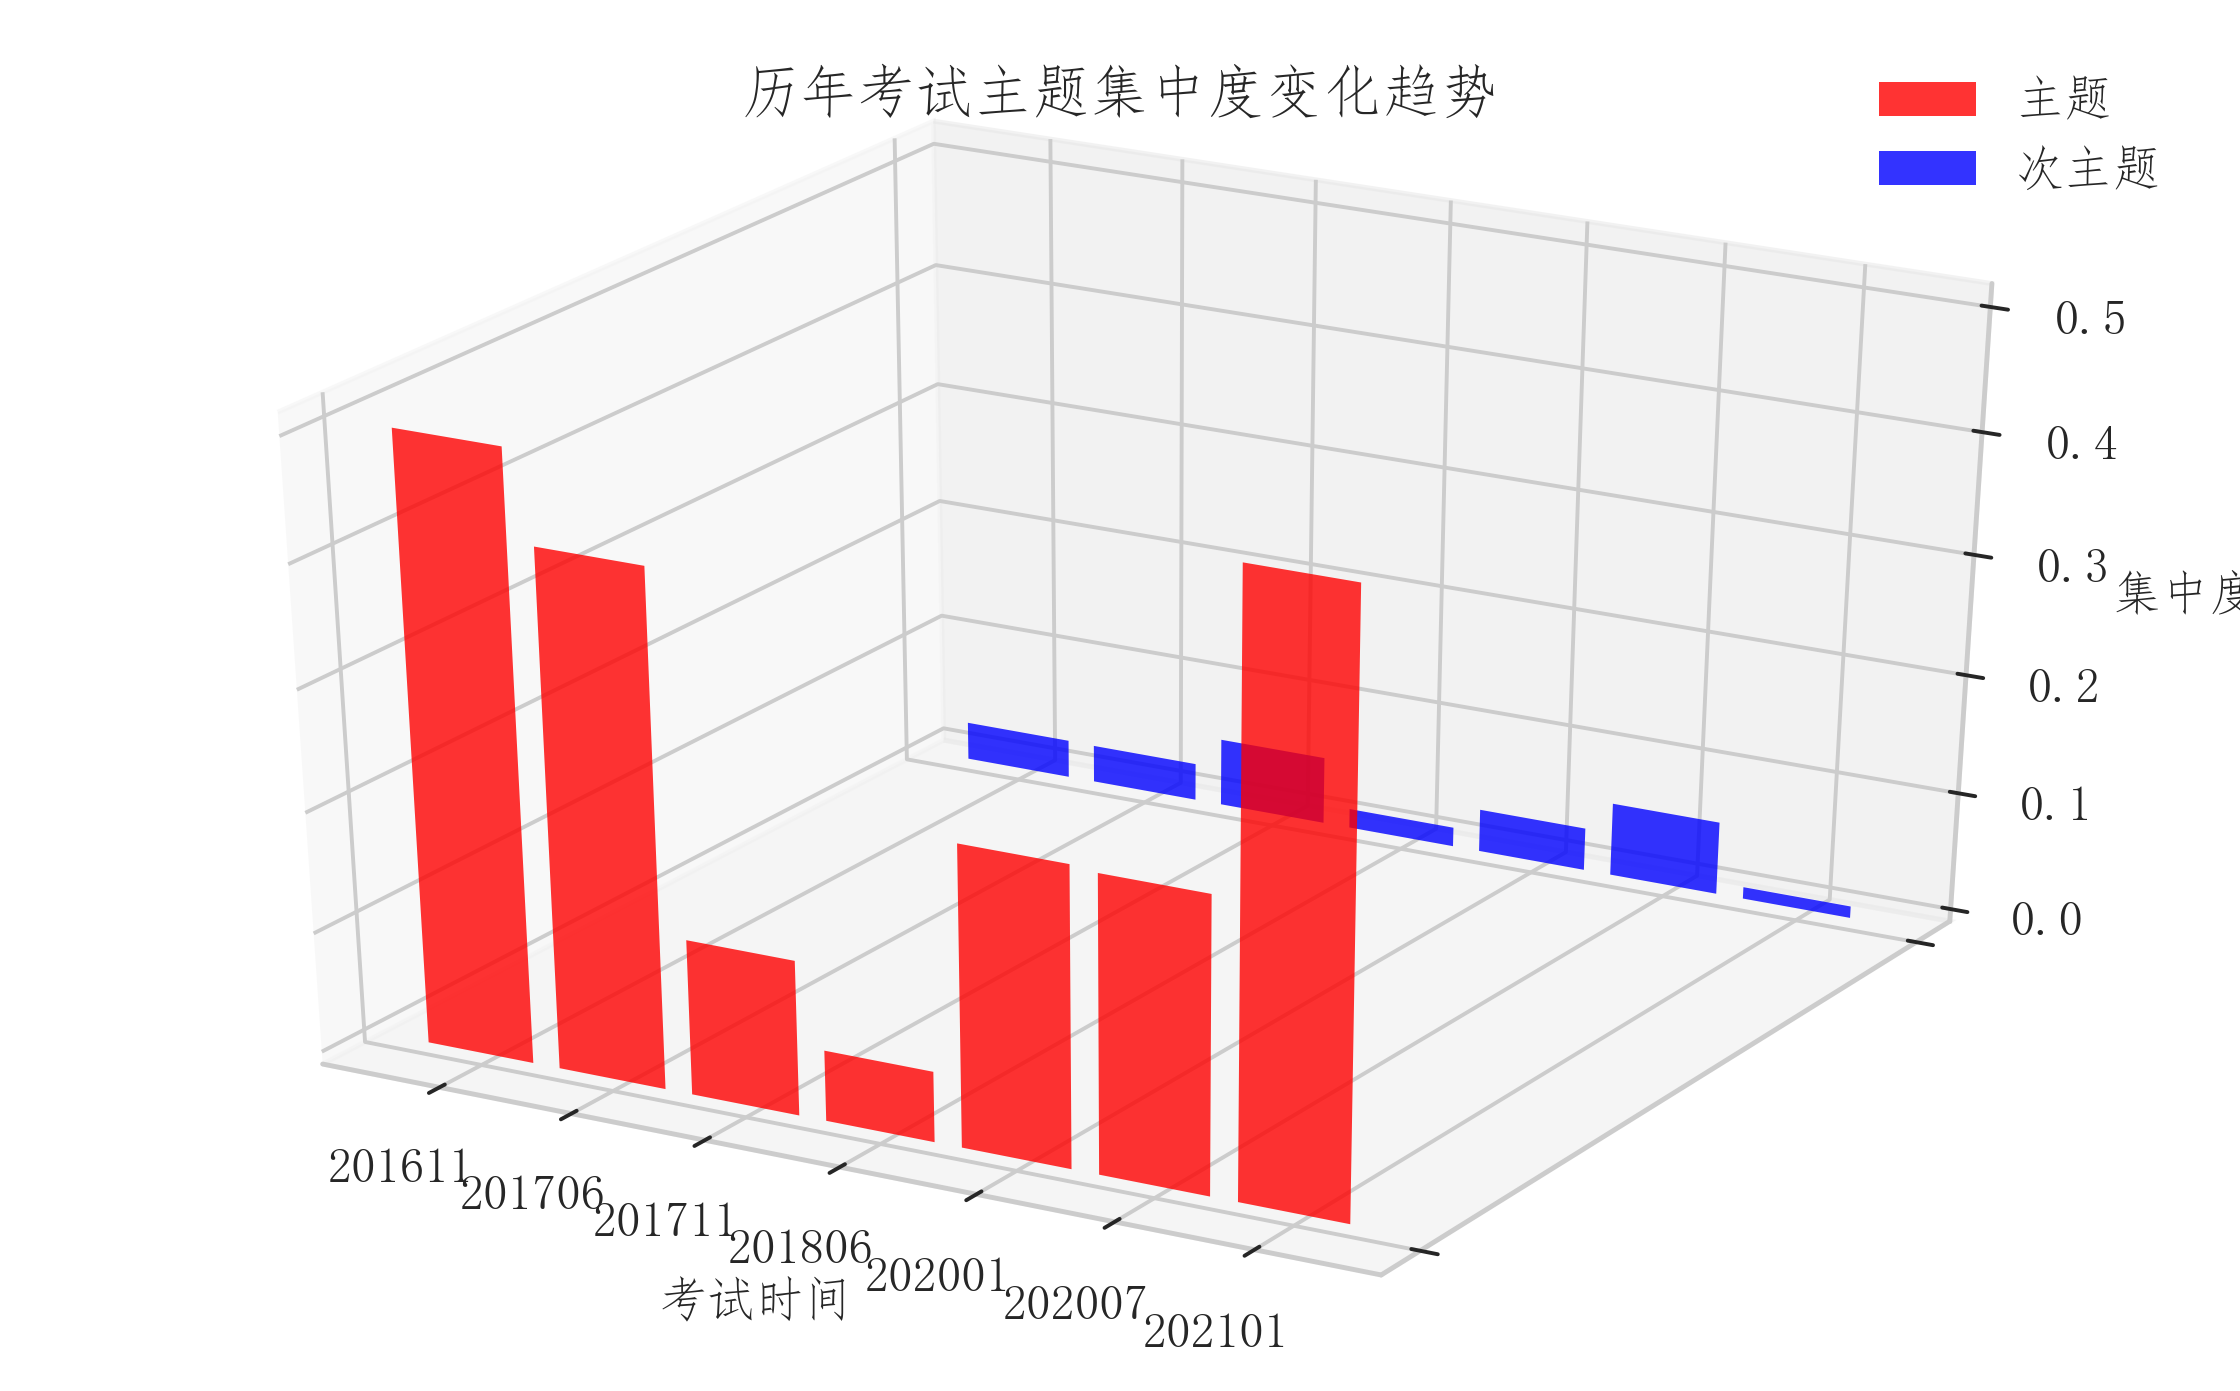

In [615]:
folder=r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写'
names=[]
for name in os.listdir(folder):
        if name[-4:]=='.txt':
            names.append(name[:6])
item1='主题集中度'
item2='次主题集中度'
liss=(target[item1][0],target[item2][0])
ynames=[item1[:2],item2[:3]]
xnames=names
tnames=('考试时间',None,'集中度')
#ThreeD_bar_plot(liss,xnames=np.arange(100),ynames=['项目1','项目2'],names=['维度1','维度2','维度3'],title='none')
ThreeD_bar_plot(liss,xnames,ynames,tnames,'历年考试主题集中度变化趋势',)

4 10 8 6
6 8 10 7
5 7 10 6
6 7 8 6
['201610', '201706', '201710', '201806', '202001', '202007', '202101']
[[('she', 20, 1), ('to', 19, 2), ('the', 15, 3), ('jane', 10, 4), ('and', 10, 4), ('her', 10, 4), ('a', 10, 4), ('that', 6, 8), ('in', 5, 9), ('tom', 5, 9), ('had', 5, 9), ('for', 5, 9), ('lake', 4, 13), ('was', 4, 13), ('``', 4, 13), ('they', 3, 16), ('walked', 3, 16), ('with', 3, 16), ('him', 3, 16), ('stream', 3, 16), ('camp', 2, 21), ('by', 2, 21), ('forest', 2, 21), ('unfortunately', 2, 21), ('on', 2, 21), ('way', 2, 21), ('an', 2, 21), ('came', 2, 21), ('time', 2, 21), ('so', 2, 21), ('better', 2, 21), ("''", 2, 21), ('no', 2, 21), ('see', 2, 21), ('saw', 2, 21), ('but', 2, 21), ('if', 2, 21), ('as', 2, 21), ('night', 2, 21), ('wanted', 2, 21), ('much', 2, 21), ('at', 2, 21), ('few', 2, 21), ('along', 2, 21), ('it', 2, 21), ('helicopter', 2, 21), ('one', 1, 47), ('weekend', 1, 47), ('july', 1, 47), ('husband', 1, 47), ('driven', 1, 47), ('three', 1, 47), ('hours', 1, 47), ('o

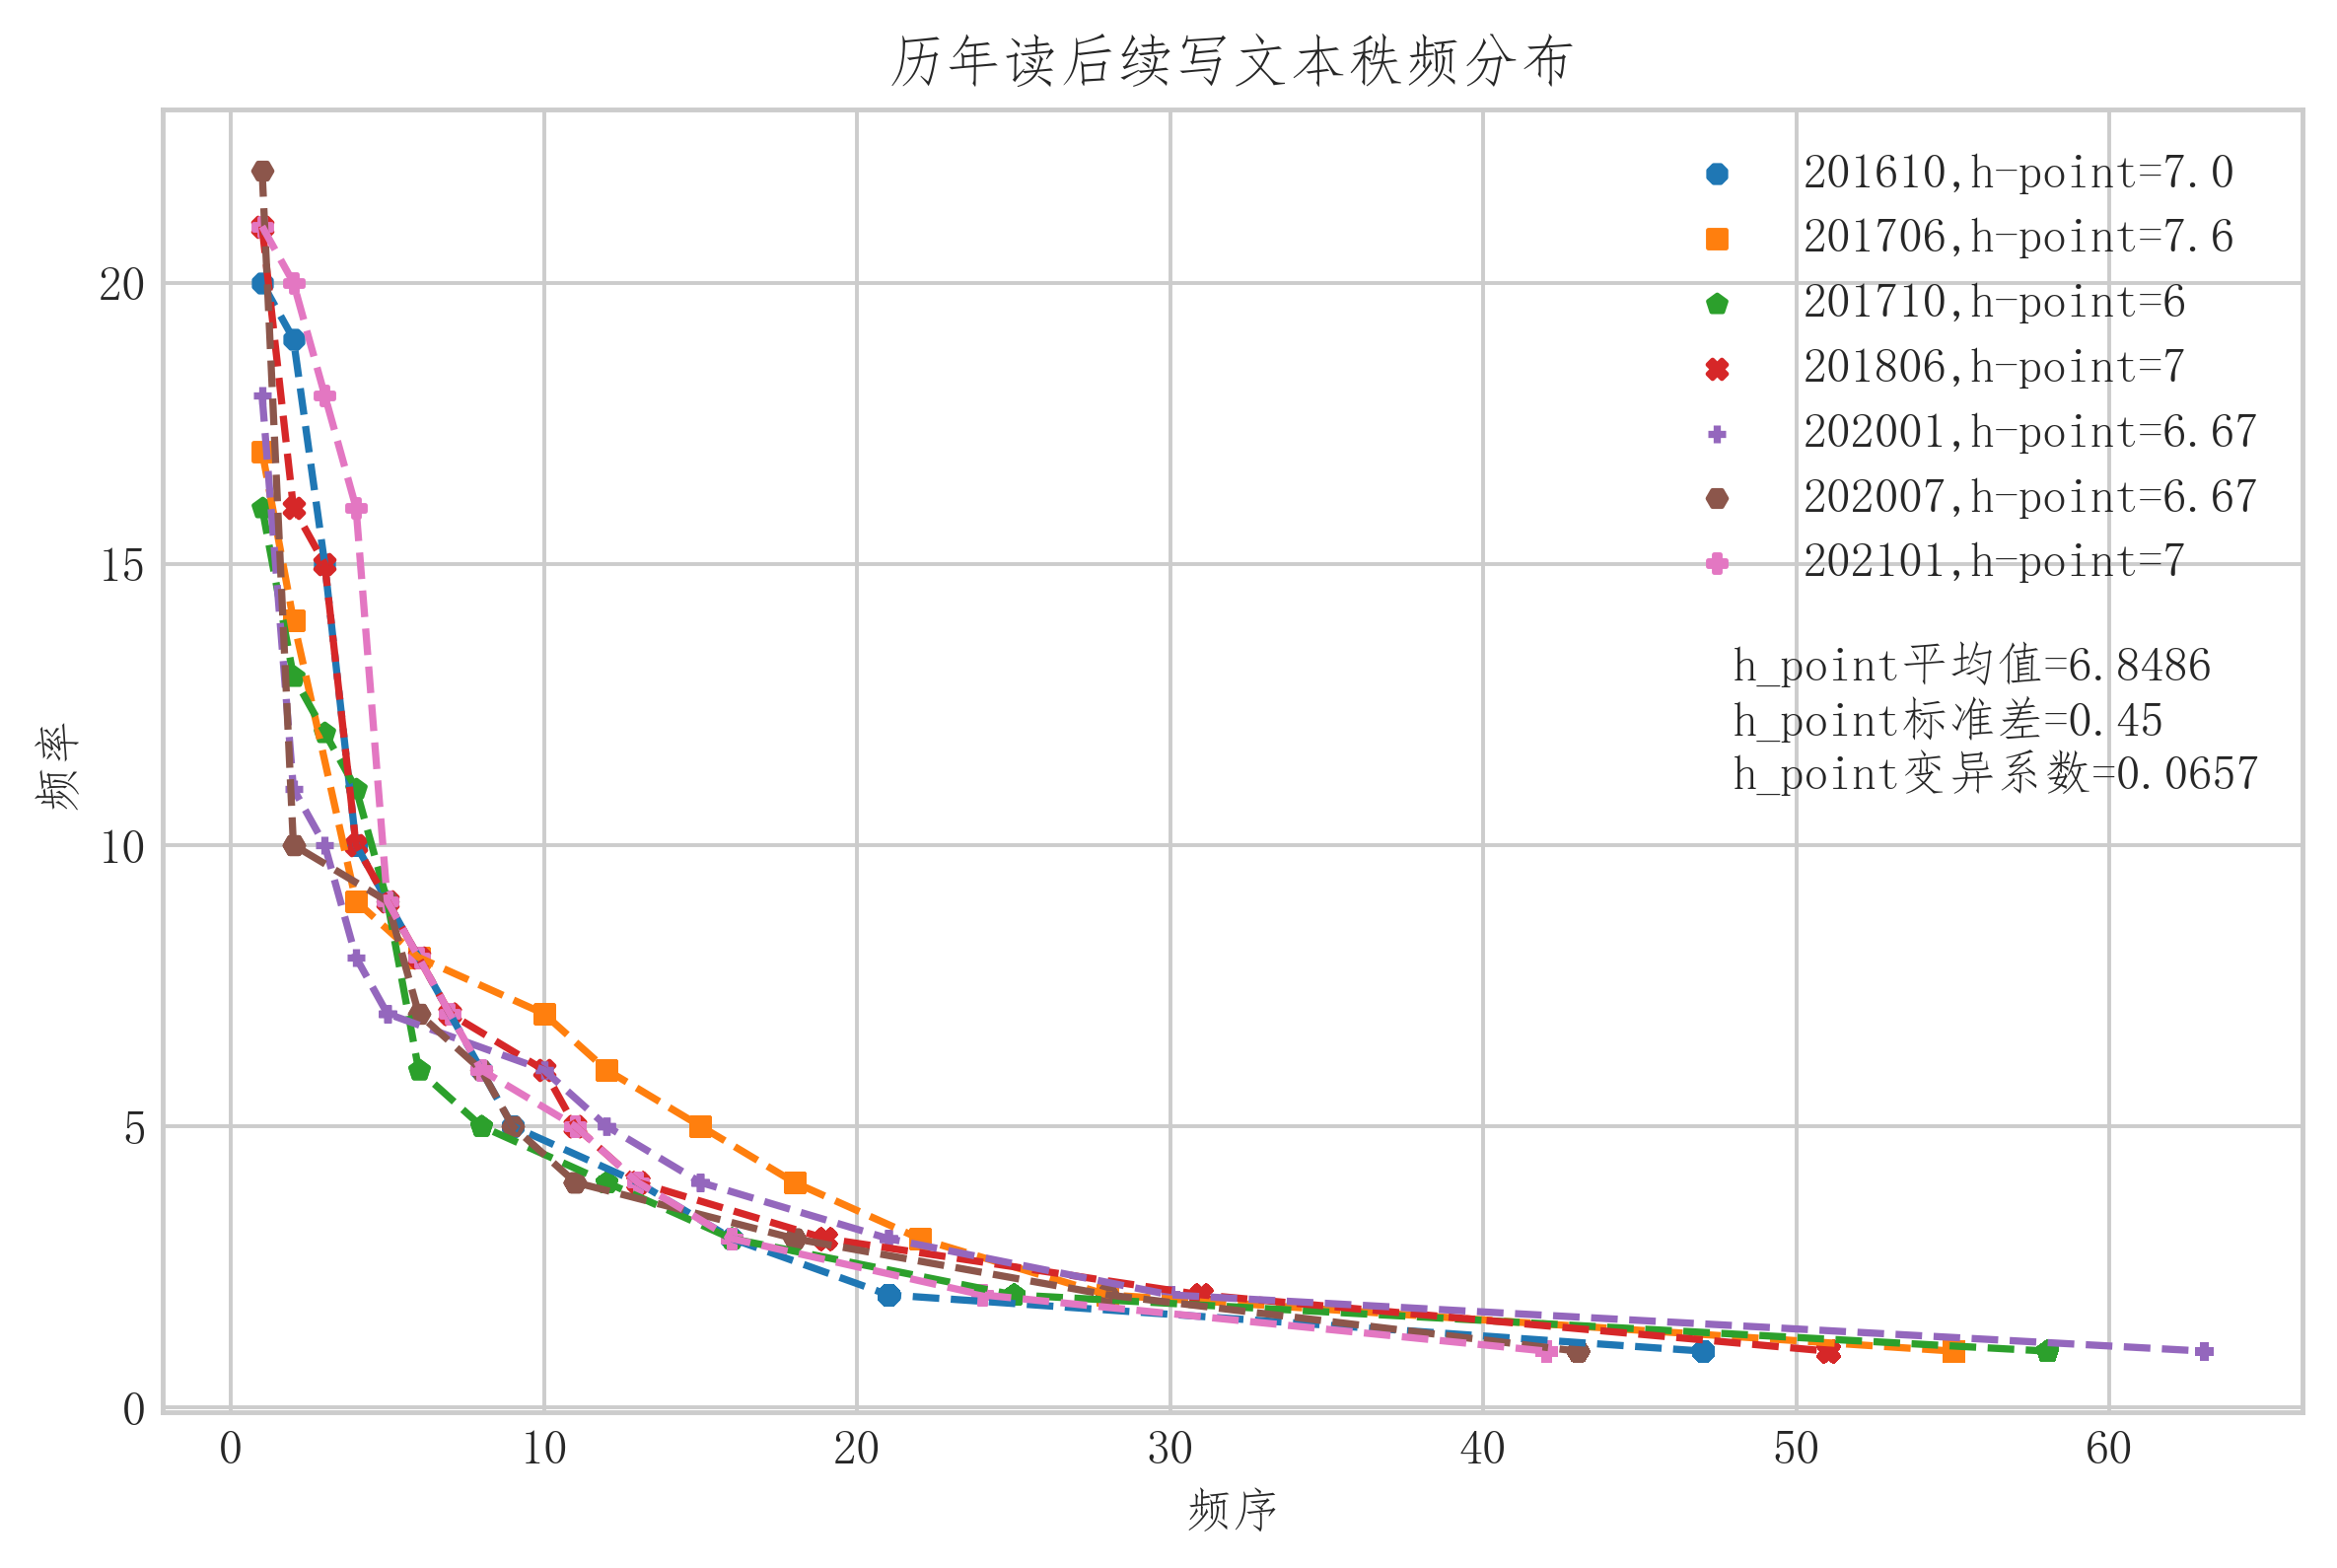

In [495]:
RFplot_stack_folder(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写')

In [297]:
TAplot_bar_folder(r'C:\Users\spike\Documents\论文相关\2016-2021浙江省高考读后续写作者风格计量分析\2016-2021读后续写')

4 10 8 6
4 10 8 6
4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$'

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

4 10 8 6
(['she', 'jane', 'her'], ['tom', 'had', 'lake', 'was'])
[('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('she', 'PRP', 'she'), ('Jane', 'NNP', 'jane'), ('her', 'PRP', 'her'), ('she', 'PRP', 'she'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('Jane', 'NNP', 'jane'), ('her', 'PRP$', 'her'), ('she', 

KeyboardInterrupt: 

In [604]:
history

for n in (1,2,3,4,5):
    while n !=5:
        print(n)
thwmetrics('I love my mom. Mom is nice')
def thwmetrics(text):
    cwpos=("MD","VB","VBD","VBG","VBN","VBP","VBZ","JJ","JJR","JJS","RB","RBR","RBS","NN","NNS","NNP","NNPS","WP","WP$","WRB","PRP","PRP$")
    sentlist=nltk.sent_tokenize(text)
    stanzw=[]
    for sent in sentlist:
        stanzw.extend(stanz(sent))
    thwords=themewords(text)
    print(thwords)
    TWm=[]
    STWm=[]
    for w in stanzw:
        #print(w)
        if w[0].lower() in thwords[0]:
            if w[1] in ('NNP','NNPS'):
                TWm.append((w[0],w[1],w[3]))
            elif w[1] in cwpos:
                TWm.append((w[0].lower(),w[1],w[3].lower()))
        elif w[0].lower() in thwords[1]:
            if w[1] in ('NNP','NNPS'):
                STWm.append((w[0],w[1],w[3]))
            elif w[1] in cwpos:
                STWm.append((w[0].lower(),w[1],w[3].lower()))
    print(TWm)
    print(STWm)
    TWm = list({}.fromkeys(TWm).keys())
    STWm = 